In [1]:
from astropy.io import fits
import os
from sklearn import preprocessing
import shutil

from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize
from scipy.interpolate import CubicSpline
from scipy.integrate import simps
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter
import scipy.signal as signal
from astropy.time import Time
import pandas as pd
from lmfit import Model
from PyAstronomy.pyasl import foldAt
from scipy.optimize import curve_fit
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from scipy.ndimage.filters import uniform_filter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

(array([934., 103.,  87.,  31.,  27.,   4.,   5.,   7.,   3.,   2.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          2.,   0.,   2.]),
 array([  186.3  ,   686.208,  1186.116,  1686.024,  2185.932,  2685.84 ,
         3185.748,  3685.656,  4185.564,  4685.472,  5185.38 ,  5685.288,
         6185.196,  6685.104,  7185.012,  7684.92 ,  8184.828,  8684.736,
         9184.644,  9684.552, 10184.46 , 10684.368, 11184.276, 11684.184,
        12184.092, 12684.   ]),
 <a list of 25 Patch objects>)

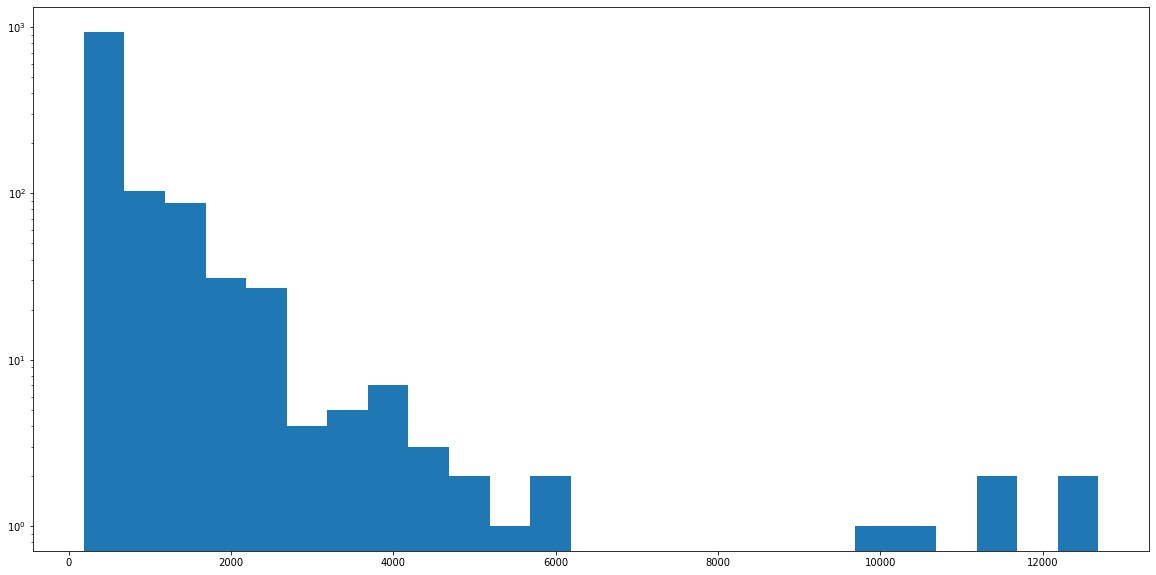

In [9]:
indata = np.loadtxt("LewisLT/statsNH", usecols=(2))
#

mean = indata
plt.figure(figsize=(20,10))
plt.hist(mean,bins=25,log=True)

In [11]:
sortedD = np.sort(indata)
for el in sortedD:
    print(el)

186.3
186.3
186.4
186.7
186.8
187.0
189.0
189.1
189.2
189.2
189.6
189.8
189.8
189.8
190.3
190.4
190.4
190.5
190.7
190.7
191.1
191.3
191.8
191.9
192.3
192.3
192.4
192.4
192.4
192.6
192.9
193.0
193.1
193.4
194.0
194.0
196.6
196.8
196.9
197.0
197.2
197.6
199.0
199.0
199.1
199.2
199.3
199.5
200.6
201.5
201.6
202.3
202.4
202.4
202.7
203.0
203.2
203.2
203.6
203.7
203.8
204.0
204.9
205.0
205.9
206.0
206.4
206.7
206.8
207.0
207.6
207.9
208.1
208.4
208.8
208.8
209.0
209.0
209.5
209.6
209.6
209.9
210.2
210.3
211.7
212.1
212.4
212.5
212.6
212.7
212.7
212.7
212.7
212.8
212.8
212.9
213.1
213.4
213.6
213.7
213.8
213.8
214.0
214.2
214.2
214.8
215.1
215.1
215.3
215.3
215.5
215.9
215.9
216.0
216.4
216.4
216.5
217.1
217.1
217.2
217.3
217.4
217.4
217.5
217.7
217.7
218.0
218.3
219.1
219.1
219.1
219.4
219.4
219.8
220.0
220.0
220.6
220.9
220.9
221.1
221.1
221.2
221.3
221.4
221.5
221.5
221.5
221.7
221.7
221.7
221.8
221.8
221.9
222.0
222.3
222.3
222.4
222.8
222.8
223.5
223.5
223.7
223.7
223.7
223.8
223.9
224.

In [2]:
hdul = fits.open('LewisLT/SDSS0842/selected/WrongSolutionq_e_20200226_1_1_1_1.fits')
hdr = hdul[0].header
print(repr(hdr)) 
hdul.close()        


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / Required FITS header                           
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  513 / Required FITS header                           
NAXIS2  =                  513 / Required FITS header                           
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT1= 'Most headers are only updated at the start of the multrun'           
COMMENT2= 'Telescope pointing, status and CCDATEMP etc are static at MULTRUN st'
DATE    = '2020-02-26'         / Exposure start                                 
DATE-OBS= '2020-02-26T20:46:26.662' / Date of observation                       
UTSTART = '20:46:26.662'    

In [3]:
hdul = fits.open('PL20A08/SDSS1637/aligned/aligned_q_e_20200115_15_1_1_1.fits')
hdr = hdul[0].header
print(repr(hdr)) 
hdul.close()        


SIMPLE  =                    T / Created by ImageJ FITS_Writer                  
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 513  / length of data axis 1                          
NAXIS2  =                 513  / length of data axis 2                          
BZERO   = 33292.6196689363     / data range offset                              
BSCALE  = 1.02385424353886     / scaling factor                                 
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT1= 'Most headers are only updated at the start of the multrun'           
COMMENT2= 'Telescope pointing, status and CCDATEMP etc are static at MULTRUN st'
DATE    = '2020-01-16'      

In [4]:
hdul = fits.open('LewisLT/SDSS0842/selected/Orientation2q_e_20200119_10_1_1_1.fits')
hdr = hdul[0].header
print(repr(hdr)) 
hdul.close()        

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / Required FITS header                           
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  513 / Required FITS header                           
NAXIS2  =                  513 / Required FITS header                           
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT1= 'Most headers are only updated at the start of the multrun'           
COMMENT2= 'Telescope pointing, status and CCDATEMP etc are static at MULTRUN st'
DATE    = '2020-01-20'         / Exposure start                                 
DATE-OBS= '2020-01-20T05:05:47.443' / Date of observation                       
UTSTART = '05:05:47.443'    

In [5]:
hdul = fits.open('LewisLT/SDSS0842/selected/Orientation3q_e_20200120_3_1_1_1.fits')
hdr = hdul[0].header
print(repr(hdr)) 
hdul.close()        

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / Required FITS header                           
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  513 / Required FITS header                           
NAXIS2  =                  513 / Required FITS header                           
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT1= 'Most headers are only updated at the start of the multrun'           
COMMENT2= 'Telescope pointing, status and CCDATEMP etc are static at MULTRUN st'
DATE    = '2020-01-20'         / Exposure start                                 
DATE-OBS= '2020-01-20T22:44:33.550' / Date of observation                       
UTSTART = '22:44:33.550'    

In [6]:
hdul = fits.open('LewisLT/SDSS0842/selected/Orientation4q_e_20200213_11_1_1_1.fits')
hdr = hdul[0].header
print(repr(hdr)) 
hdul.close()        #L1STATZE

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / Required FITS header                           
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  513 / Required FITS header                           
NAXIS2  =                  513 / Required FITS header                           
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT1= 'Most headers are only updated at the start of the multrun'           
COMMENT2= 'Telescope pointing, status and CCDATEMP etc are static at MULTRUN st'
DATE    = '2020-02-14'         / Exposure start                                 
DATE-OBS= '2020-02-14T02:49:36.380' / Date of observation                       
UTSTART = '02:49:36.380'    

In [7]:
hdul = fits.open('LT/7/q_e_20200816_1_12_1_1.fits')
hdr = hdul[0].header
print(repr(hdr)) 
hdul.close()        #L1STATZE

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / Required FITS header                           
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  513 / Required FITS header                           
NAXIS2  =                  513 / Required FITS header                           
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT1= 'Most headers are only updated at the start of the multrun'           
COMMENT2= 'Telescope pointing, status and CCDATEMP etc are static at MULTRUN st'
DATE    = '2020-08-16'         / Exposure start                                 
DATE-OBS= '2020-08-16T21:06:22.951' / Date of observation                       
UTSTART = '21:06:22.951'    

In [3]:
path = 'LewisLT/'
uniqueObjects = []
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['OBJECT']
        uniqueObjects.append(objName)
        
uniqueObjects = list(dict.fromkeys(uniqueObjects))
print(uniqueObjects)

['CLS50', 'SBSS1310', 'CBS311', 'SDSS0910', 'SDSS0842', 'SDSS0901', 'CLS29', 'SDSS1518', 'SDSS1548', 'SDSS1637', 'SDSS1015', 'KA2']


In [ ]:
path = 'LewisLT/'
uniqueObjects = []
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['OBJECT']
        uniqueObjects.append(objName)
        
uniqueObjects = list(dict.fromkeys(uniqueObjects))
print(uniqueObjects)

In [17]:
path = 'LewisLT/CBS311/'
uniqueObjects = []
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
path = 'LewisLT/CLS29/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
path = 'LewisLT/CLS50/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
            
path = 'LewisLT/KA2/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
path = 'LewisLT/SBSS1310/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
path = 'LewisLT/SDSS0842/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
path = 'LewisLT/SDSS0901/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
path = 'LewisLT/SDSS0910/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
path = 'LewisLT/SDSS1015/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
            
path = 'LewisLT/SDSS1518/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
            
path = 'LewisLT/SDSS1548/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)
            
path = 'LewisLT/SDSS1637/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['WCS_ERR']
        if objName == 2:
            uniqueObjects.append(line)

In [18]:
uniqueObjects

['q_e_20200217_4_1_1_1.fits',
 'q_e_20200226_5_1_1_1.fits',
 'q_e_20200226_5_2_1_1.fits',
 'q_e_20200226_5_3_1_1.fits',
 'q_e_20200227_5_1_1_1.fits',
 'q_e_20200227_5_2_1_1.fits',
 'q_e_20200227_5_3_1_1.fits',
 'q_e_20200228_3_1_1_1.fits',
 'q_e_20200228_3_2_1_1.fits',
 'q_e_20200228_3_3_1_1.fits',
 'q_e_20200227_8_1_1_1.fits',
 'q_e_20200227_8_2_1_1.fits',
 'q_e_20200227_8_3_1_1.fits',
 'q_e_20200119_5_1_1_1.fits',
 'q_e_20200119_5_2_1_1.fits',
 'q_e_20200119_5_3_1_1.fits',
 'q_e_20200120_7_1_1_1.fits',
 'q_e_20200120_7_2_1_1.fits',
 'q_e_20200120_7_3_1_1.fits',
 'q_e_20200128_5_1_1_1.fits',
 'q_e_20200128_5_2_1_1.fits',
 'q_e_20200128_5_3_1_1.fits',
 'q_e_20200205_1_1_1_1.fits',
 'q_e_20200205_1_2_1_1.fits',
 'q_e_20200212_8_1_1_1.fits',
 'q_e_20200212_8_2_1_1.fits',
 'q_e_20200212_8_3_1_1.fits',
 'q_e_20200215_9_1_1_1.fits',
 'q_e_20200215_9_2_1_1.fits',
 'q_e_20200215_9_3_1_1.fits',
 'q_e_20200217_12_1_1_1.fits',
 'q_e_20200217_12_2_1_1.fits',
 'q_e_20200217_12_3_1_1.fits',
 'q_e_2

In [19]:



with open('WCSError.txt', 'w') as f:
    for item in uniqueObjects:
        f.write("%s\n" % item)

In [7]:
path = 'LewisLT/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['OBJECT']
        hdul.close()
        shutil.move(filepath, "LewisLT/"+objName+"/"+line)
        

In [ ]:
path = 'LewisLT/'
with open(path+'filenames.txt') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        objName = hdul[0].header['OBJECT']
        hdul.close()
        shutil.move(filepath, "LewisLT/"+objName+"/"+line)
        

In [9]:
path = 'LewisLT/SDSS0901/'
for i in range(3,33):
    os.mkdir(path+str(i))

(0.2, 0.26)

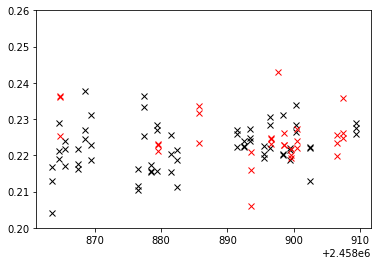

In [3]:
dataLT2 = pd.read_csv('LewisLT/SDSS0901/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS0901/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/SDSS0901/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
C2Count3 = dataLT2['Source-Sky_C3']
C3Count3 = dataLT2['Source-Sky_C4']
plt.plot(timeLT3,revFluxLT3,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS0901/Aligned4.xls', delimiter='\t')
timeLT4 = dataLT2['JD_UTC']
revFluxLT4 = dataLT2['rel_flux_T1']
fluxErr4 = dataLT2['rel_flux_err_T1']
TarCount4 = dataLT2['Source-Sky_T1']
C1Count4 = dataLT2['Source-Sky_C2']
C2Count4 = dataLT2['Source-Sky_C3']
C3Count4 = dataLT2['Source-Sky_C4']
plt.plot(timeLT4,revFluxLT4,'rx')


dataLT2 = pd.read_csv('LewisLT/SDSS0901/Aligned5.xls', delimiter='\t')
timeLT5 = dataLT2['JD_UTC']
revFluxLT5 = dataLT2['rel_flux_T1']
fluxErr5 = dataLT2['rel_flux_err_T1']
TarCount5 = dataLT2['Source-Sky_T1']
C1Count5 = dataLT2['Source-Sky_C2']
C2Count5 = dataLT2['Source-Sky_C3']
C3Count5 = dataLT2['Source-Sky_C4']
plt.plot(timeLT5,revFluxLT5,'rx')

plt.ylim(0.2,0.26)

Tar Count:  7707.583377040404 ; C1 Count:  4053.494150909091 ; C2 Count:  20223.410455292928 ; C3 Count:  4229.62554795098


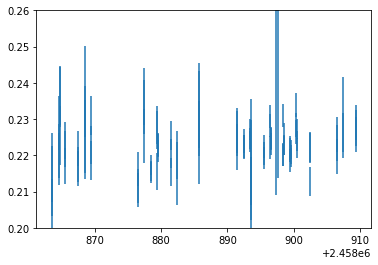

In [4]:
allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allTime = np.append(allTime,timeLT4)
allTime = np.append(allTime,timeLT5)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allFlux = np.append(allFlux,revFluxLT4)
allFlux = np.append(allFlux,revFluxLT5)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)
allErr = np.append(allErr,fluxErr4)
allErr = np.append(allErr,fluxErr5)
sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T
plt.ylim(0.2,0.26)
#np.savetxt('SDSS0901.dat', dat, delimiter = '\t')

allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)
allTarCount = np.append(allTarCount,TarCount4)
allTarCount = np.append(allTarCount,TarCount5)

allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)
allC1Count = np.append(allC1Count,C1Count4)
allC1Count = np.append(allC1Count,C1Count5)

allC2Count = np.append(C2Count1,C2Count2)
allC2Count = np.append(allC2Count,C2Count3)
allC2Count = np.append(allC2Count,C2Count4)
allC2Count = np.append(allC2Count,C2Count5)

allC3Count = np.append(C3Count1,C3Count2)
allC3Count = np.append(allC1Count,C3Count3)
allC3Count = np.append(allC1Count,C3Count4)
allC3Count = np.append(allC1Count,C3Count5)

print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count))

In [42]:
len(allTime)

91

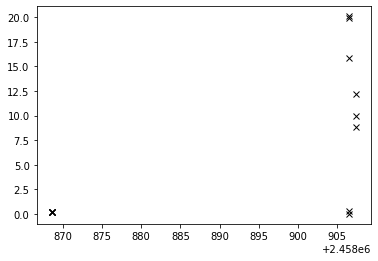

In [27]:
plt.plot(timeLT3,revFluxLT3,'kx')


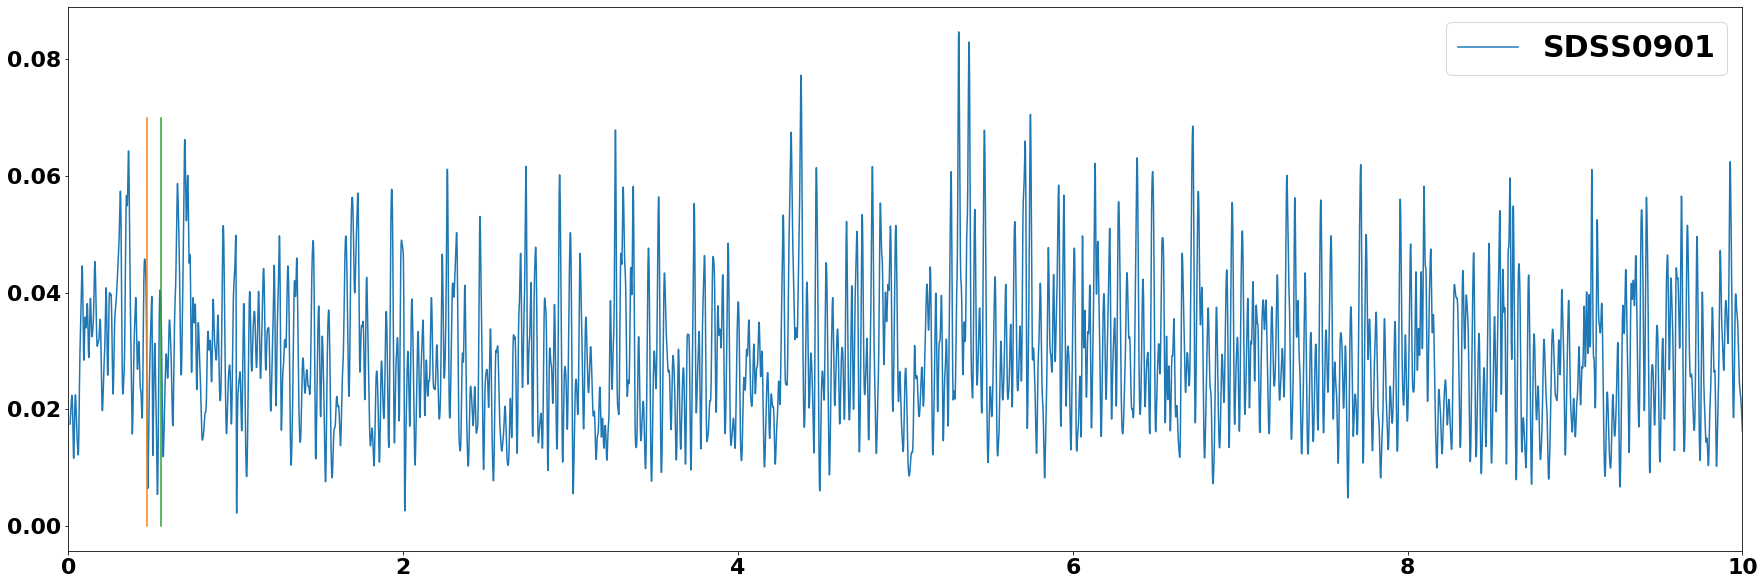

In [44]:
freq = np.linspace(0.01,10,10000)
allTime = np.append(timeLT1,timeLT2)
allFlux = np.append(revFluxLT1,revFluxLT2)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS0901')
plt.legend(fontsize=30)
from pylab import rc
font = {'family' : 'normal',
        'size'   : 22}

rc('font', **font)
plt.plot([0.47,0.47],[0,0.07])
plt.plot([0.55,0.55],[0,0.07])
plt.xlim(0,10)
plt.savefig('SDSS0901.pdf')
#plt.plot([5.5,5.5],[0,0.07])

In [23]:
len(allTime)

91

Tar Count:  6126.725338724138 ; C1 Count:  71707.3430774023 ; C2 Count:  19836.422648804593 ; C3 Count:  30548.570436425292


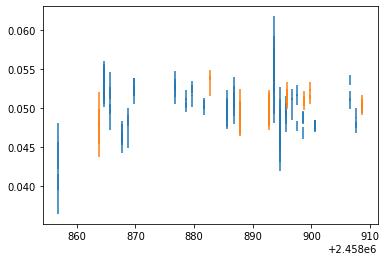

In [6]:
dataLT2 = pd.read_csv('LewisLT/CBS311/Aligned1Up.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
plt.errorbar(timeLT1,revFluxLT1,yerr=fluxErr1,ls='')

dataLT2 = pd.read_csv('LewisLT/CBS311/Aligned2Up.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
plt.errorbar(timeLT2,revFluxLT2,yerr=fluxErr2,ls='')

allTarCount = np.append(TarCount1,TarCount2)

allC1Count = np.append(C1Count1,C1Count2)

allC2Count = np.append(C2Count1,C2Count2)

allC3Count = np.append(C3Count1,C3Count2)

print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count))

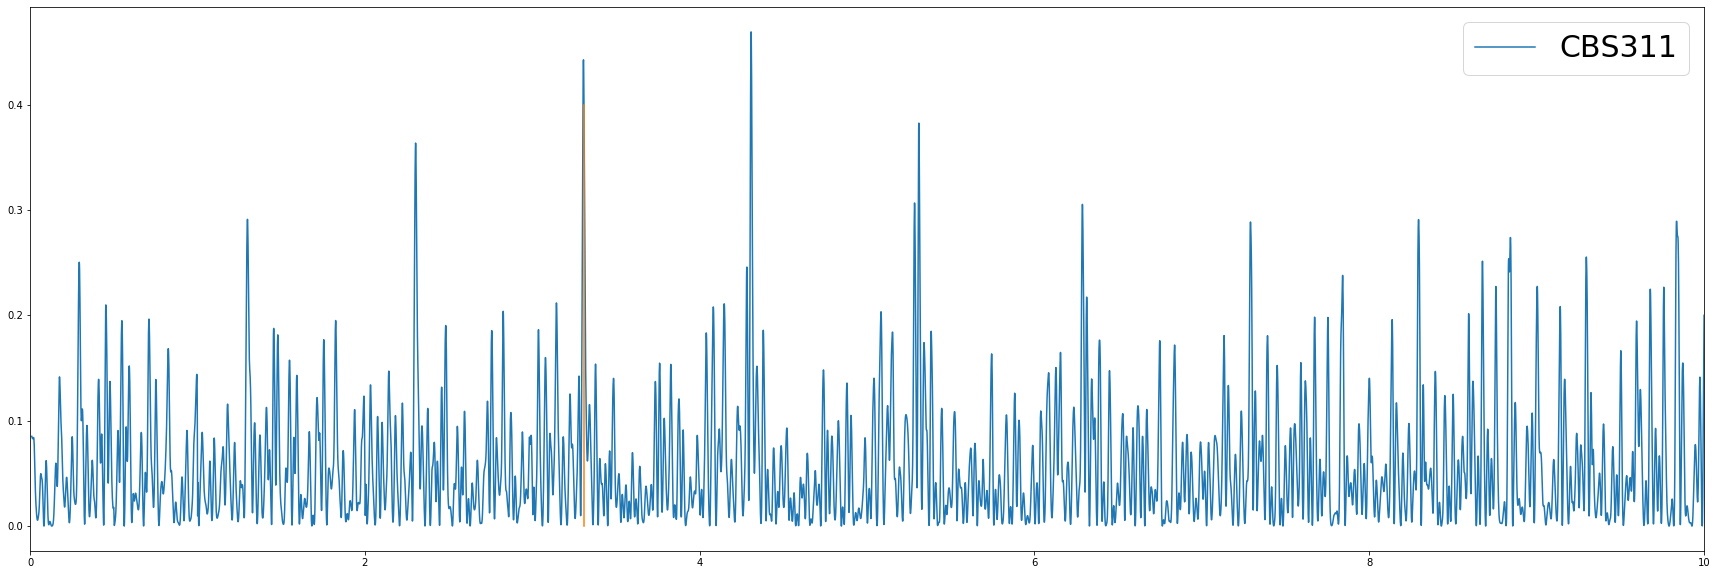

In [13]:
freq = np.linspace(0.01,10,10000)
allTime = np.append(timeLT1,timeLT2)
allFlux = np.append(revFluxLT1,revFluxLT2)
allErr = np.append(fluxErr1,fluxErr2)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='CBS311')
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/0.302,1/0.302],[0,0.4])
plt.savefig('CBS311.pdf')

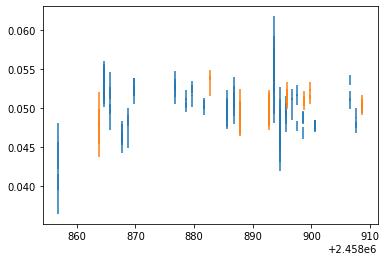

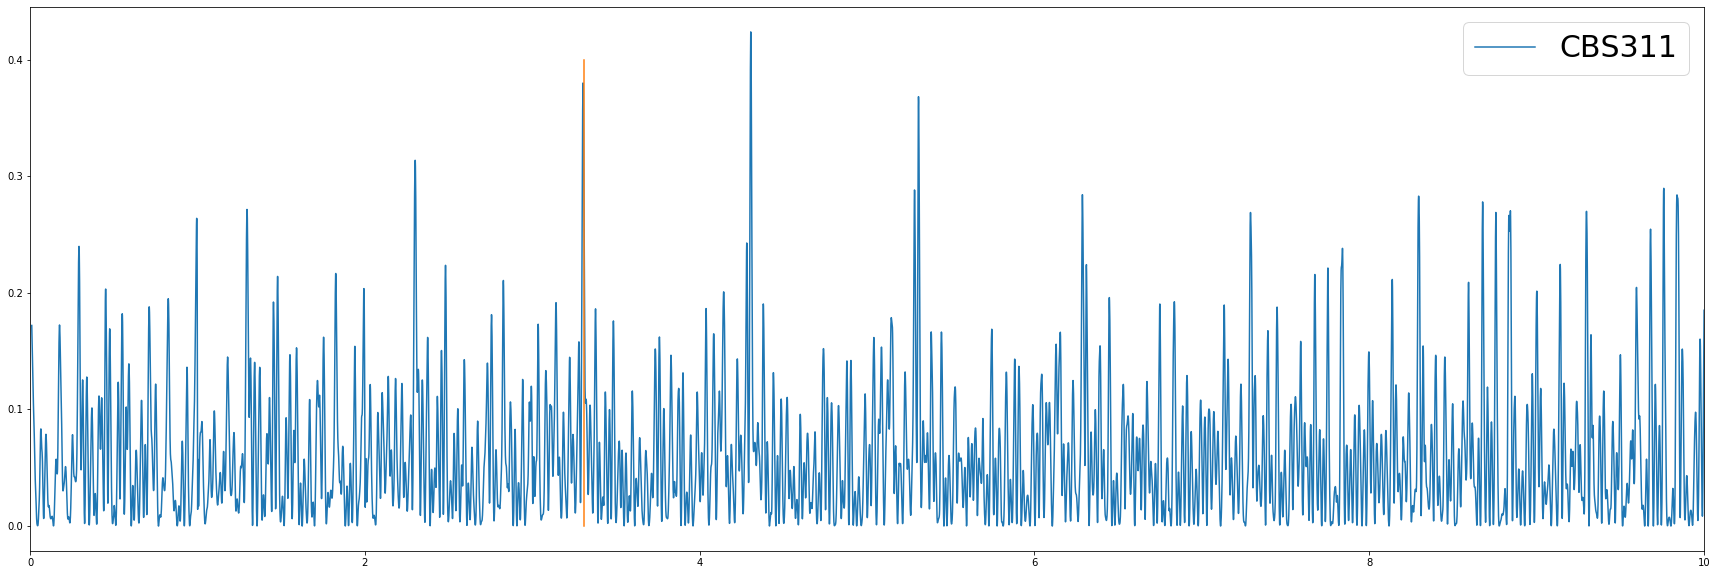

In [14]:
dataLT2 = pd.read_csv('LewisLT/CBS311/Aligned1Up.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']

plt.errorbar(timeLT1,revFluxLT1,yerr=fluxErr1,ls='')

dataLT2 = pd.read_csv('LewisLT/CBS311/Aligned2Up.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
plt.errorbar(timeLT2,revFluxLT2,yerr=fluxErr2,ls='')
plt.show()
freq = np.linspace(0.01,10,10000)
allTime = np.append(timeLT1,timeLT2)
allFlux = np.append(revFluxLT1,revFluxLT2)
allErr = np.append(fluxErr1,fluxErr2)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='CBS311')
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/0.302,1/0.302],[0,0.4])


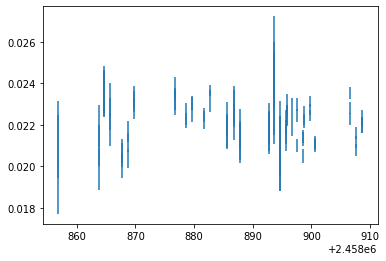

In [37]:
sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('CBS311.dat', dat, delimiter = '\t')

(1.2, 1.8)

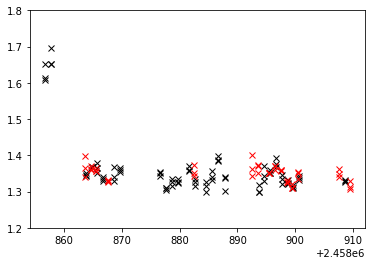

In [7]:
dataLT2 = pd.read_csv('LewisLT/SBSS1310/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/SBSS1310/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/SBSS1310/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
C2Count3 = dataLT2['Source-Sky_C3']
C3Count3 = dataLT2['Source-Sky_C4']
plt.plot(timeLT3,revFluxLT3,'kx')

dataLT2 = pd.read_csv('LewisLT/SBSS1310/Aligned4.xls', delimiter='\t')
timeLT4 = dataLT2['JD_UTC']
revFluxLT4 = dataLT2['rel_flux_T1']
fluxErr4 = dataLT2['rel_flux_err_T1']
TarCount4 = dataLT2['Source-Sky_T1']
C1Count4 = dataLT2['Source-Sky_C2']
C2Count4 = dataLT2['Source-Sky_C3']
C3Count4 = dataLT2['Source-Sky_C4']
plt.plot(timeLT4,revFluxLT4,'rx')


dataLT2 = pd.read_csv('LewisLT/SBSS1310/Aligned5.xls', delimiter='\t')
timeLT5 = dataLT2['JD_UTC']
revFluxLT5 = dataLT2['rel_flux_T1']
fluxErr5 = dataLT2['rel_flux_err_T1']
TarCount5 = dataLT2['Source-Sky_T1']
C1Count5 = dataLT2['Source-Sky_C2']
C2Count5 = dataLT2['Source-Sky_C3']
C3Count5 = dataLT2['Source-Sky_C4']
plt.plot(timeLT5,revFluxLT5,'rx')

plt.ylim(1.2,1.8)

Tar Count:  54042.65668350757 ; C1 Count:  7233.370110772727 ; C2 Count:  3472.209509992425 ; C3 Count:  7142.830338607407


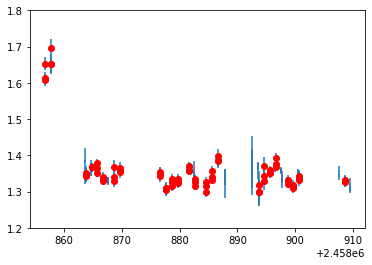

In [8]:
allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allTime = np.append(allTime,timeLT4)
allTime = np.append(allTime,timeLT5)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allFlux = np.append(allFlux,revFluxLT4)
allFlux = np.append(allFlux,revFluxLT5)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)
allErr = np.append(allErr,fluxErr4)
allErr = np.append(allErr,fluxErr5)
sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
plt.plot(timeLT1,revFluxLT1,'ro')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T
plt.ylim(1.2,1.8)

allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)
allTarCount = np.append(allTarCount,TarCount4)
allTarCount = np.append(allTarCount,TarCount5)

allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)
allC1Count = np.append(allC1Count,C1Count4)
allC1Count = np.append(allC1Count,C1Count5)

allC2Count = np.append(C2Count1,C2Count2)
allC2Count = np.append(allC2Count,C2Count3)
allC2Count = np.append(allC2Count,C2Count4)
allC2Count = np.append(allC2Count,C2Count5)

allC3Count = np.append(C3Count1,C3Count2)
allC3Count = np.append(allC1Count,C3Count3)
allC3Count = np.append(allC1Count,C3Count4)
allC3Count = np.append(allC1Count,C3Count5)

print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count))
#np.savetxt('SBSS1310.dat', dat, delimiter = '\t')

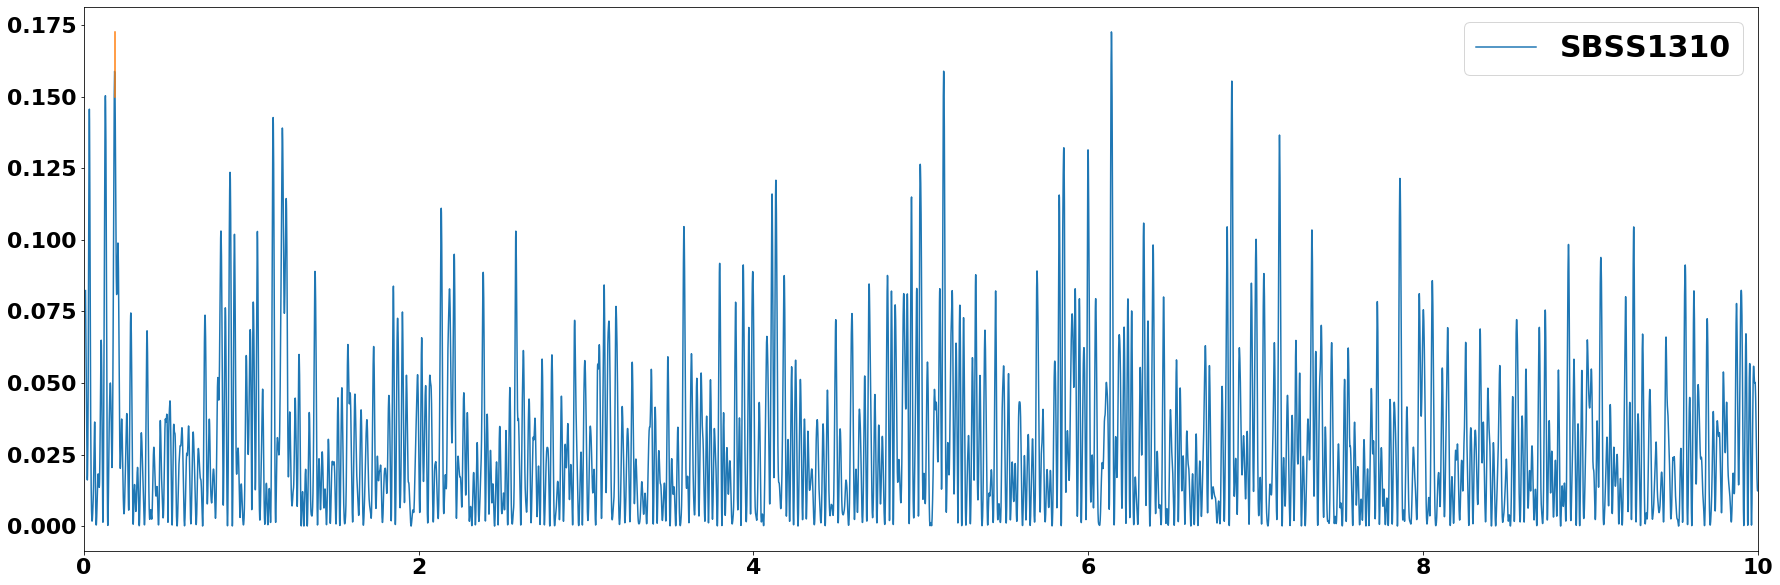

In [53]:
freq = np.linspace(0.01,10,10000)

allTime = np.append(timeLT1,timeLT2)
allFlux = np.append(revFluxLT1,revFluxLT2)
allErr = np.append(fluxErr1,fluxErr2)
powerPl = LombScargle(allTime[5:],allFlux[5:]).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SBSS1310')
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/5.3,1/5.3],[0.15,max(powerPl)])

plt.savefig('SBSS1310.pdf')

In [50]:
1/5.3

0.18867924528301888

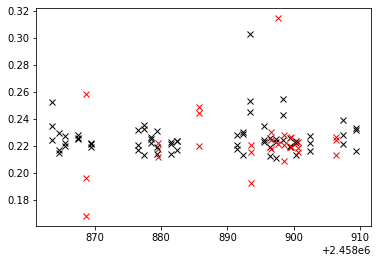

In [9]:
dataLT2 = pd.read_csv('LewisLT/SDSS0842/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS0842/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/SDSS0842/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
plt.plot(timeLT3,revFluxLT3,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS0842/Aligned4.xls', delimiter='\t')
timeLT4 = dataLT2['JD_UTC']
revFluxLT4 = dataLT2['rel_flux_T1']
fluxErr4 = dataLT2['rel_flux_err_T1']
TarCount4 = dataLT2['Source-Sky_T1']
C1Count4 = dataLT2['Source-Sky_C2']
plt.plot(timeLT4,revFluxLT4,'rx')


dataLT2 = pd.read_csv('LewisLT/SDSS0842/Aligned5.xls', delimiter='\t')
timeLT5 = dataLT2['JD_UTC']
revFluxLT5 = dataLT2['rel_flux_T1']
fluxErr5 = dataLT2['rel_flux_err_T1']
TarCount5 = dataLT2['Source-Sky_T1']
C1Count5 = dataLT2['Source-Sky_C2']
plt.plot(timeLT5,revFluxLT5,'rx')



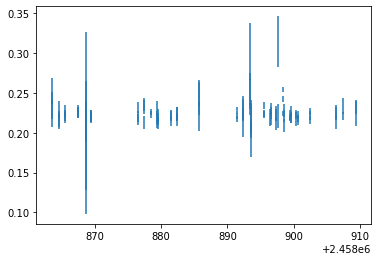

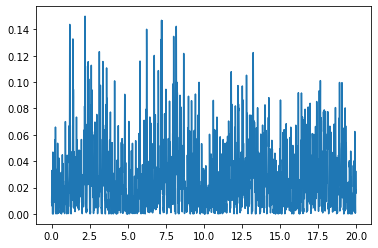

Tar Count:  8656.406868765303 ; C1 Count:  38461.96446892857


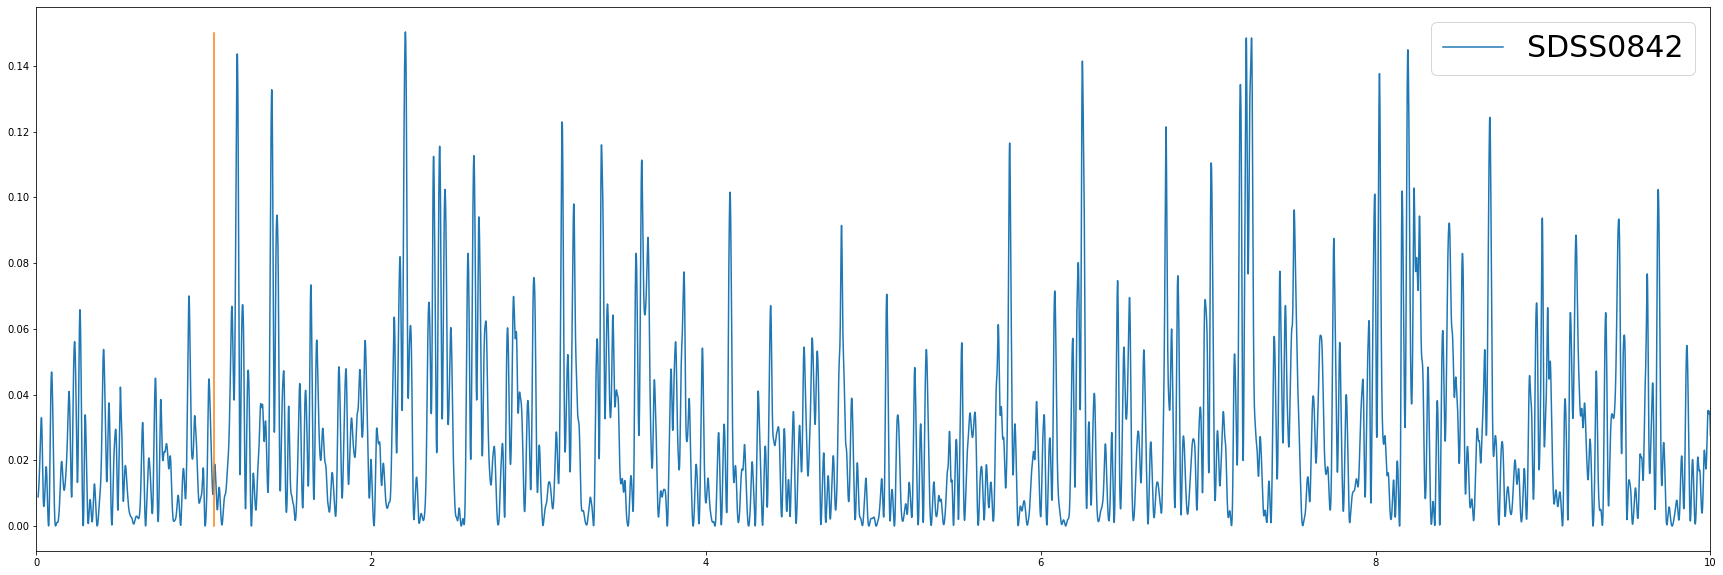

In [10]:
allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allTime = np.append(allTime,timeLT4)
allTime = np.append(allTime,timeLT5)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allFlux = np.append(allFlux,revFluxLT4)
allFlux = np.append(allFlux,revFluxLT5)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)
allErr = np.append(allErr,fluxErr4)
allErr = np.append(allErr,fluxErr5)
sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('SDSS0842.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS0842')
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/0.945,1/0.945],[0,0.15])
#plt.savefig('SDSS0842.pdf')

allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)
allTarCount = np.append(allTarCount,TarCount4)
allTarCount = np.append(allTarCount,TarCount5)

allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)
allC1Count = np.append(allC1Count,C1Count4)
allC1Count = np.append(allC1Count,C1Count5)


print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count))
#np.savetxt('SBSS1310.dat', dat, delimiter = '\t')

In [23]:
len(revFluxLT1)

98

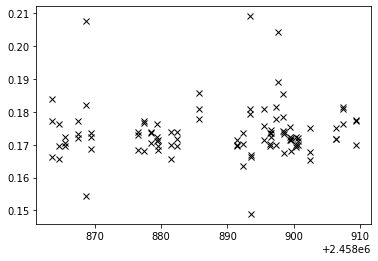

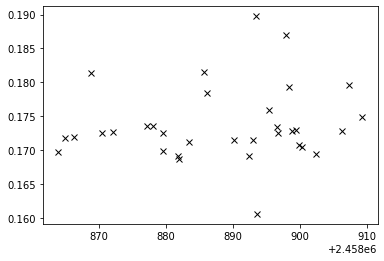

In [27]:
dataLT2 = pd.read_csv('LewisLT/SDSS0842/AlignedUpdated.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
plt.plot(timeLT1,revFluxLT1,'kx')
sortIndi = np.argsort(timeLT1)
timeLT1 = timeLT1[sortIndi]
revFluxLT1 = revFluxLT1[sortIndi]
fluxErr1 = fluxErr1[sortIndi]
window = 2*(timeLT1[2]-timeLT1[0])
tZero = timeLT1[0]

for count,el in enumerate(timeLT1):
    #print(el-tZero)
    if np.abs((el - tZero)) > window:
        #print(count)
        tZero = el
meanedFluxes = []
meanedTimes = []
for i in range(67):
    if i %3 ==0:
        newFluxVal = np.mean([revFluxLT1[i],revFluxLT1[i+1],revFluxLT1[i+2]])
        #print(i)
        newTimeVal = np.mean([timeLT1[i],timeLT1[i+1],timeLT1[i+2]])
        meanedTimes.append(newTimeVal)
        meanedFluxes.append(newFluxVal)
    else:
        pass
meanedFluxes.append(np.mean([revFluxLT1[67],revFluxLT1[68]]))
meanedTimes.append(np.mean([timeLT1[67],timeLT1[68]]))
for i in range(72,99):
    if i %3 ==0:
        newFluxVal = np.mean([revFluxLT1[i-1],revFluxLT1[i],revFluxLT1[i+1]])
        #print(i)
        newTimeVal = np.mean([timeLT1[i-1],timeLT1[i],timeLT1[i+1]])
        meanedTimes.append(newTimeVal)
        meanedFluxes.append(newFluxVal)
    else:
        pass
plt.show()
plt.plot(meanedTimes,meanedFluxes,'kx')

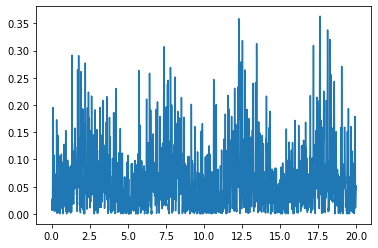

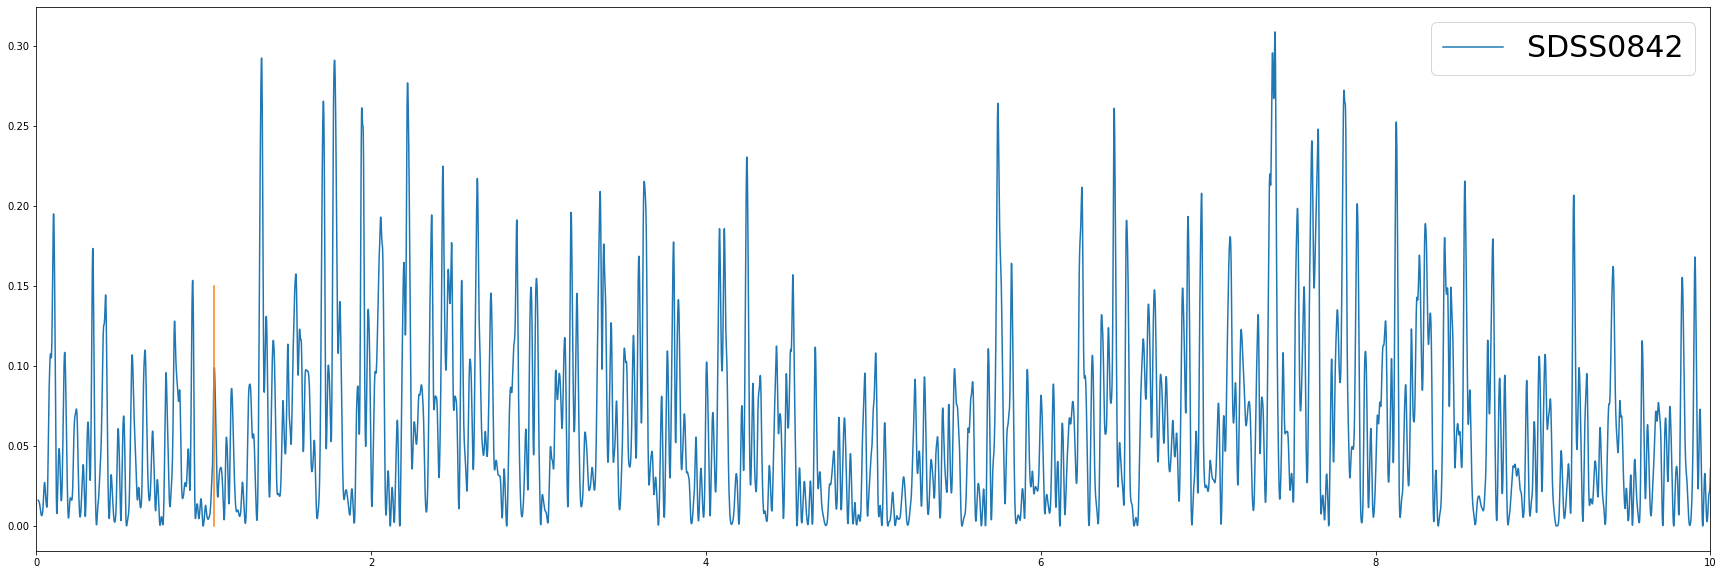

In [28]:
allTime = meanedTimes
allFlux = meanedFluxes

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS0842')
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/0.945,1/0.945],[0,0.15])
#plt.savefig('SDSS0842.pdf')



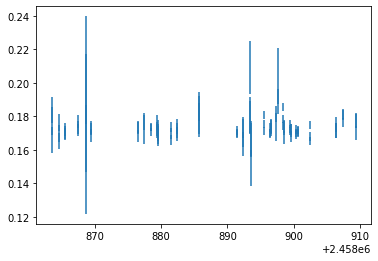

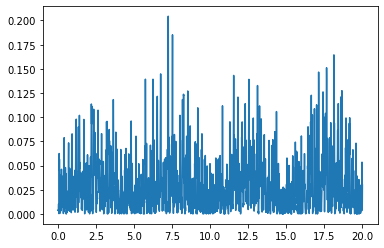

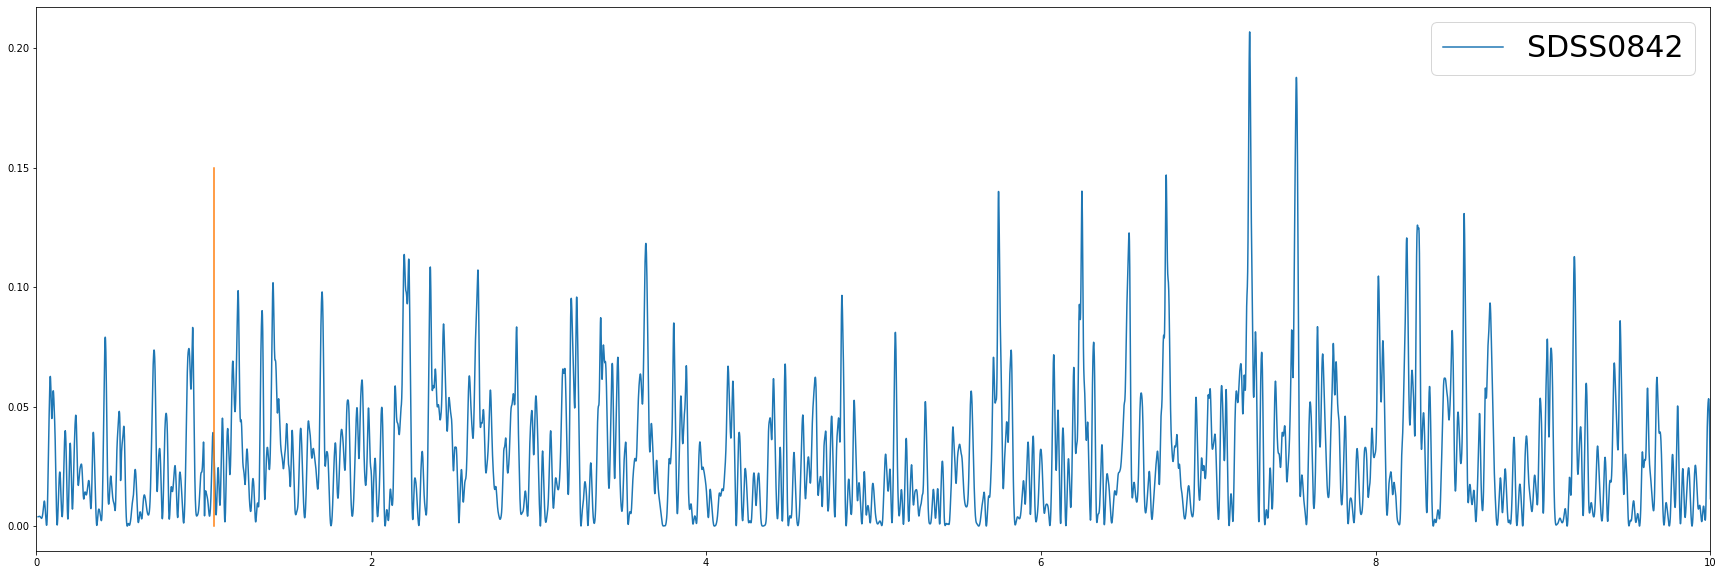

In [80]:
dataLT2 = pd.read_csv('LewisLT/SDSS0842/AlignedUpdated.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
allTime = timeLT1
allFlux = revFluxLT1
allErr = fluxErr1
sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('SDSS0842.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS0842')
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/0.945,1/0.945],[0,0.15])
#plt.savefig('SDSS0842.pdf')
keepFreq=freq
keeppowerPl = powerPl


(0.1, 0.13)

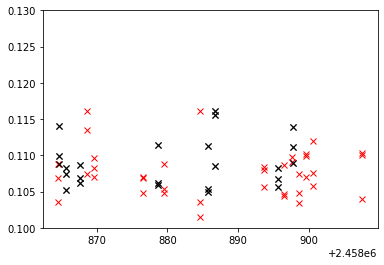

In [11]:
dataLT2 = pd.read_csv('LewisLT/SDSS0910/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS0910/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/SDSS0910/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
C2Count3 = dataLT2['Source-Sky_C3']
C3Count3 = dataLT2['Source-Sky_C4']
plt.plot(timeLT3,revFluxLT3,'kx')
plt.ylim(0.1,0.13)

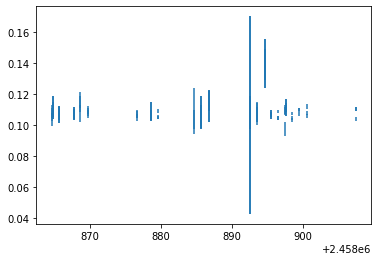

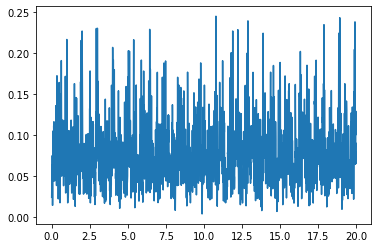

Tar Count:  9963.202411206184 ; C1 Count:  32224.21131139175 ; C2 Count:  46240.77005974227 ; C3 Count:  27549.62900000794


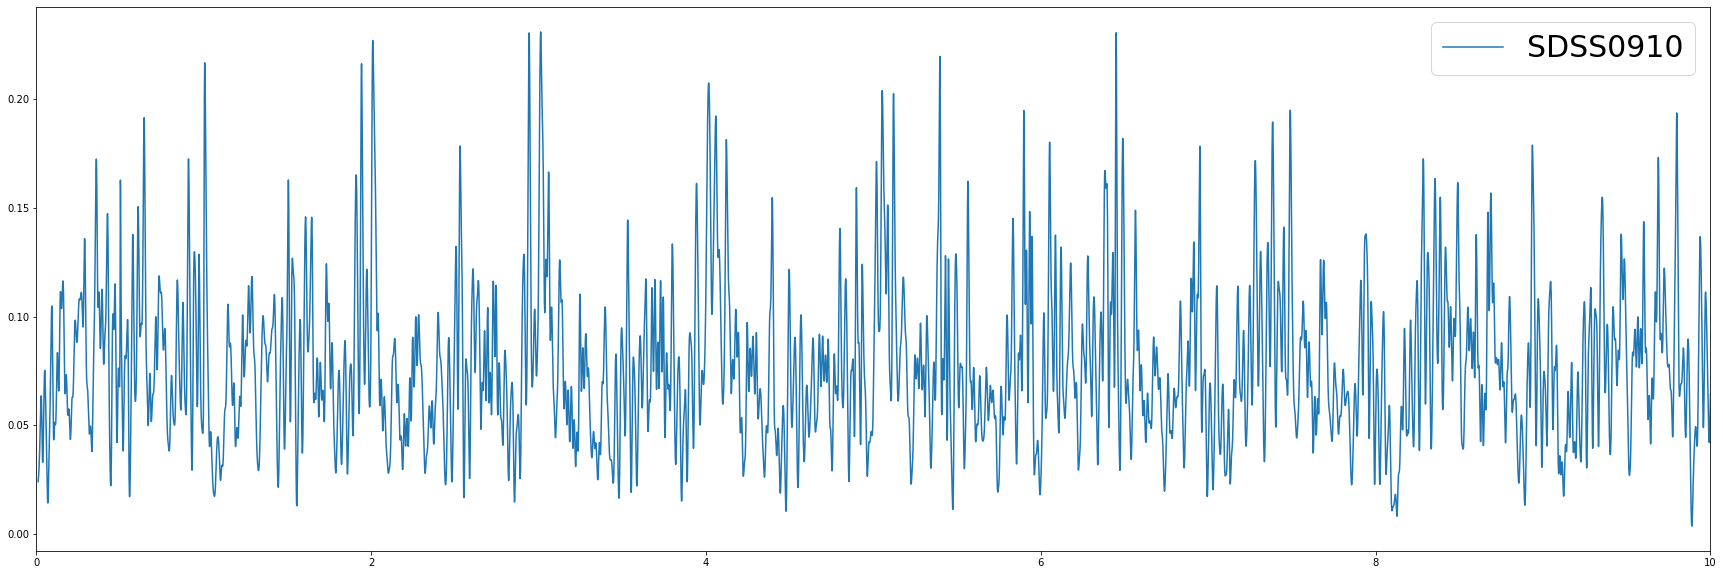

In [12]:
allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)

allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)

allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('SDSS0910.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS0910')
plt.xlim(0,10)
plt.legend(fontsize=30)
allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)


allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)


allC2Count = np.append(C2Count1,C2Count2)
allC2Count = np.append(allC2Count,C2Count3)


allC3Count = np.append(C3Count1,C3Count2)
allC3Count = np.append(allC1Count,C3Count3)

print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count))

#plt.savefig('SDSS0910.pdf')

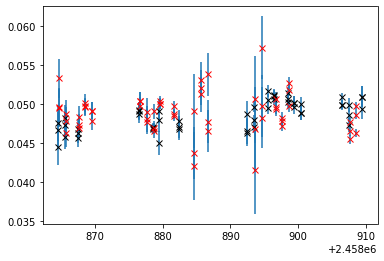

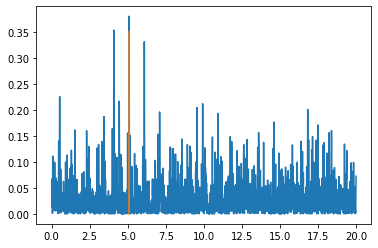

Tar Count:  11190.176078954955 ; C1 Count:  51889.30324494596 ; C2 Count:  165130.50567897296 ; C3 Count:  12893.76403835135


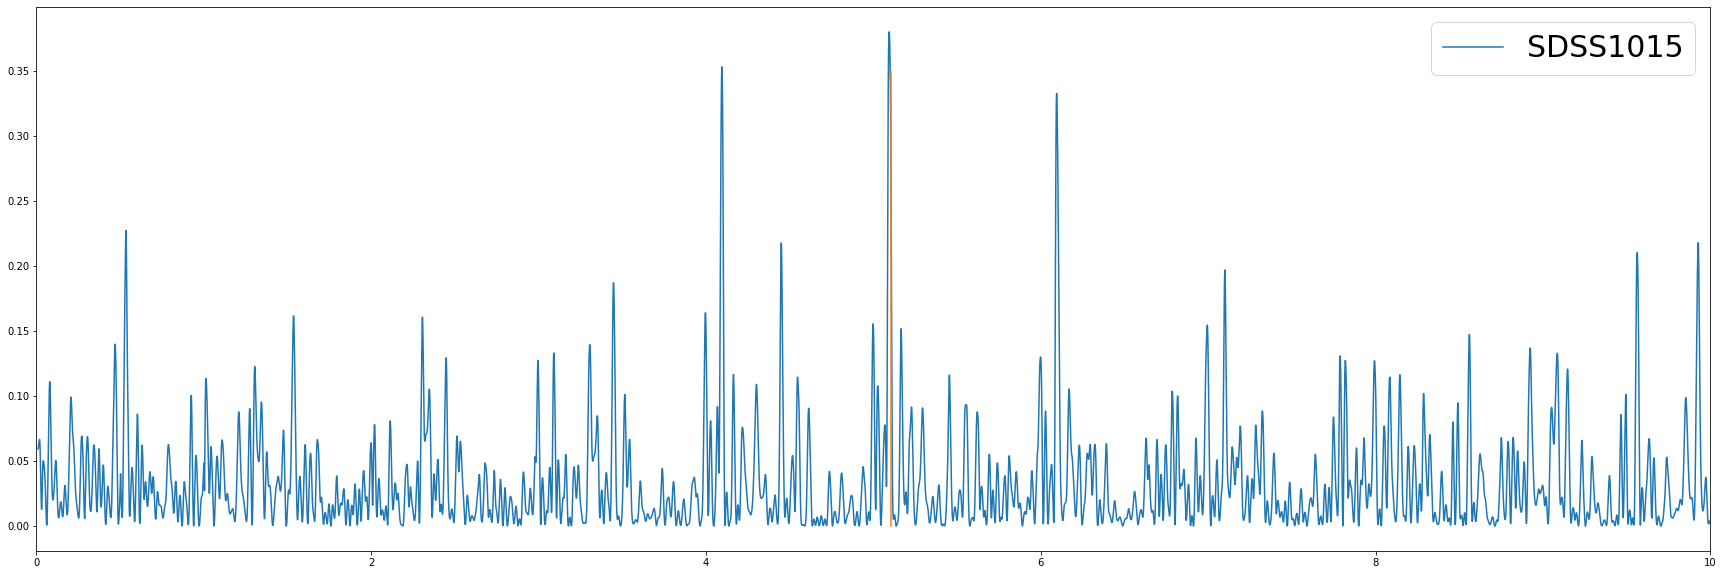

In [13]:
dataLT2 = pd.read_csv('LewisLT/SDSS1015/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS1015/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
plt.plot(timeLT2,revFluxLT2,'rx')


allTime = np.append(timeLT1,timeLT2)
allFlux = np.append(revFluxLT1,revFluxLT2)
allErr = np.append(fluxErr1,fluxErr2)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('SDSS1015.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.plot([1/0.196,1/0.196],[0,0.35])
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS1015')
plt.plot([1/0.196,1/0.196],[0,0.35])
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('SDSS1015.pdf')

allTarCount = np.append(TarCount1,TarCount2)
allC1Count = np.append(C1Count1,C1Count2)

allC2Count = np.append(C2Count1,C2Count2)

allC3Count = np.append(C3Count1,C3Count2)

print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count))


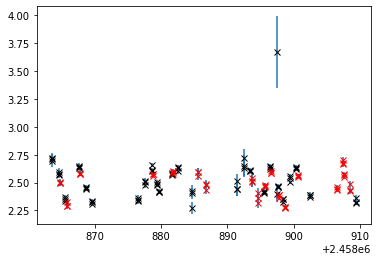

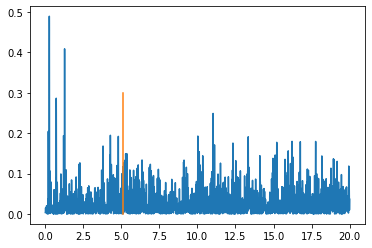

Tar Count:  74319.43490675572 ; C1 Count:  29725.54674453435


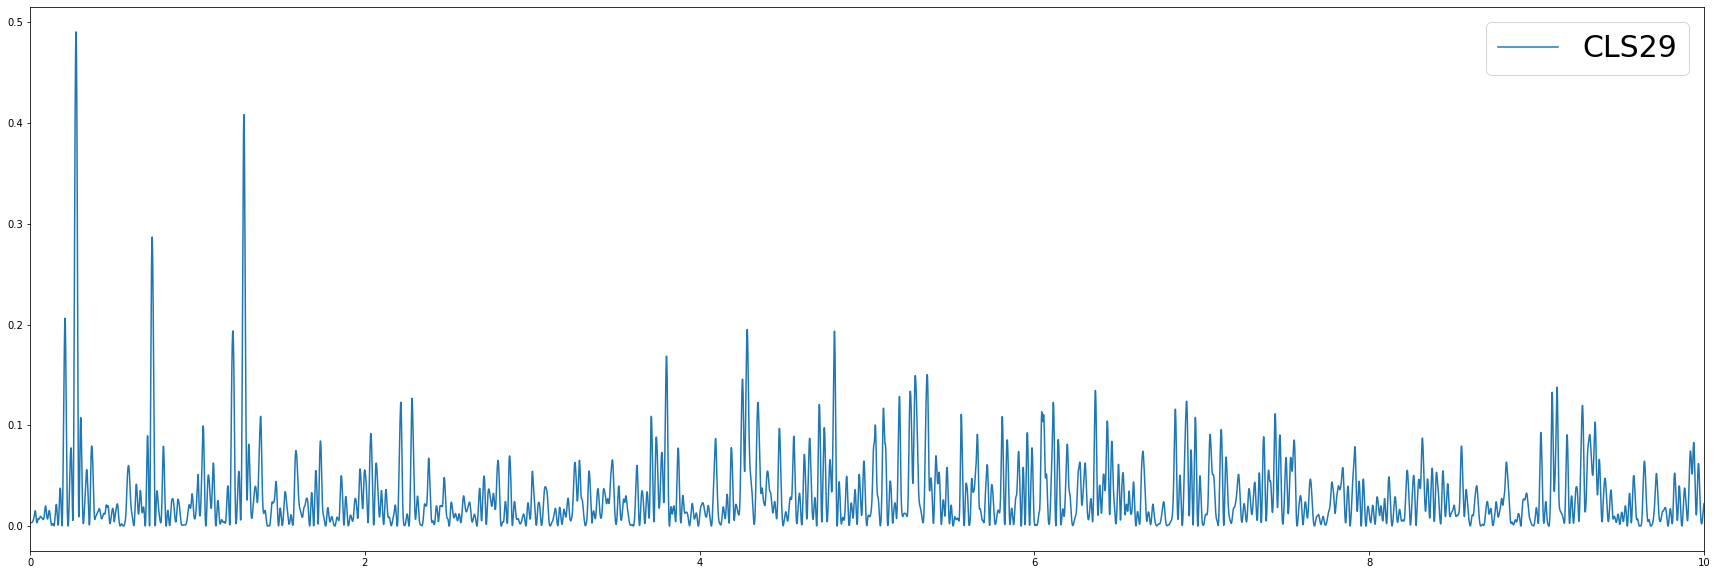

In [14]:
dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned1Up.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned2Up.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned3Up.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
plt.plot(timeLT3,revFluxLT3,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned4Up.xls', delimiter='\t')
timeLT4 = dataLT2['JD_UTC']
revFluxLT4 = dataLT2['rel_flux_T1']
fluxErr4 = dataLT2['rel_flux_err_T1']
TarCount4 = dataLT2['Source-Sky_T1']
C1Count4 = dataLT2['Source-Sky_C2']
plt.plot(timeLT4,revFluxLT4,'rx')


dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned5Up.xls', delimiter='\t')
timeLT5 = dataLT2['JD_UTC']
revFluxLT5 = dataLT2['rel_flux_T1']
fluxErr5 = dataLT2['rel_flux_err_T1']
TarCount5 = dataLT2['Source-Sky_T1']
C1Count5 = dataLT2['Source-Sky_C2']
plt.plot(timeLT5,revFluxLT5,'rx')

dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned6Up.xls', delimiter='\t')
timeLT6 = dataLT2['JD_UTC']
revFluxLT6 = dataLT2['rel_flux_T1']
fluxErr6 = dataLT2['rel_flux_err_T1']
TarCount6 = dataLT2['Source-Sky_T1']
C1Count6 = dataLT2['Source-Sky_C2']
plt.plot(timeLT6,revFluxLT6,'rx')



allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allTime = np.append(allTime,timeLT4)
allTime = np.append(allTime,timeLT5)
allTime = np.append(allTime,timeLT6)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allFlux = np.append(allFlux,revFluxLT4)
allFlux = np.append(allFlux,revFluxLT5)
allFlux = np.append(allFlux,revFluxLT6)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)
allErr = np.append(allErr,fluxErr4)
allErr = np.append(allErr,fluxErr5)
allErr = np.append(allErr,fluxErr6)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('CLS29.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.plot([1/0.196,1/0.196],[0,0.3])
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='CLS29')
plt.xlim(0,10)
plt.legend(fontsize=30)


allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)
allTarCount = np.append(allTarCount,TarCount4)
allTarCount = np.append(allTarCount,TarCount5)
allTarCount = np.append(allTarCount,TarCount6)

allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)
allC1Count = np.append(allC1Count,C1Count4)
allC1Count = np.append(allC1Count,C1Count5)
allC1Count = np.append(allC1Count,C1Count6)

print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count))

#plt.savefig('CLS29.pdf')

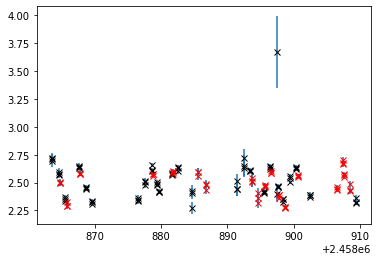

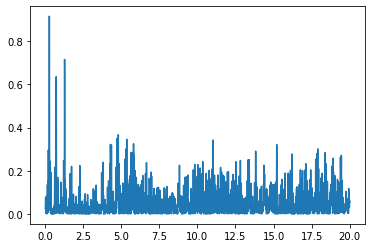

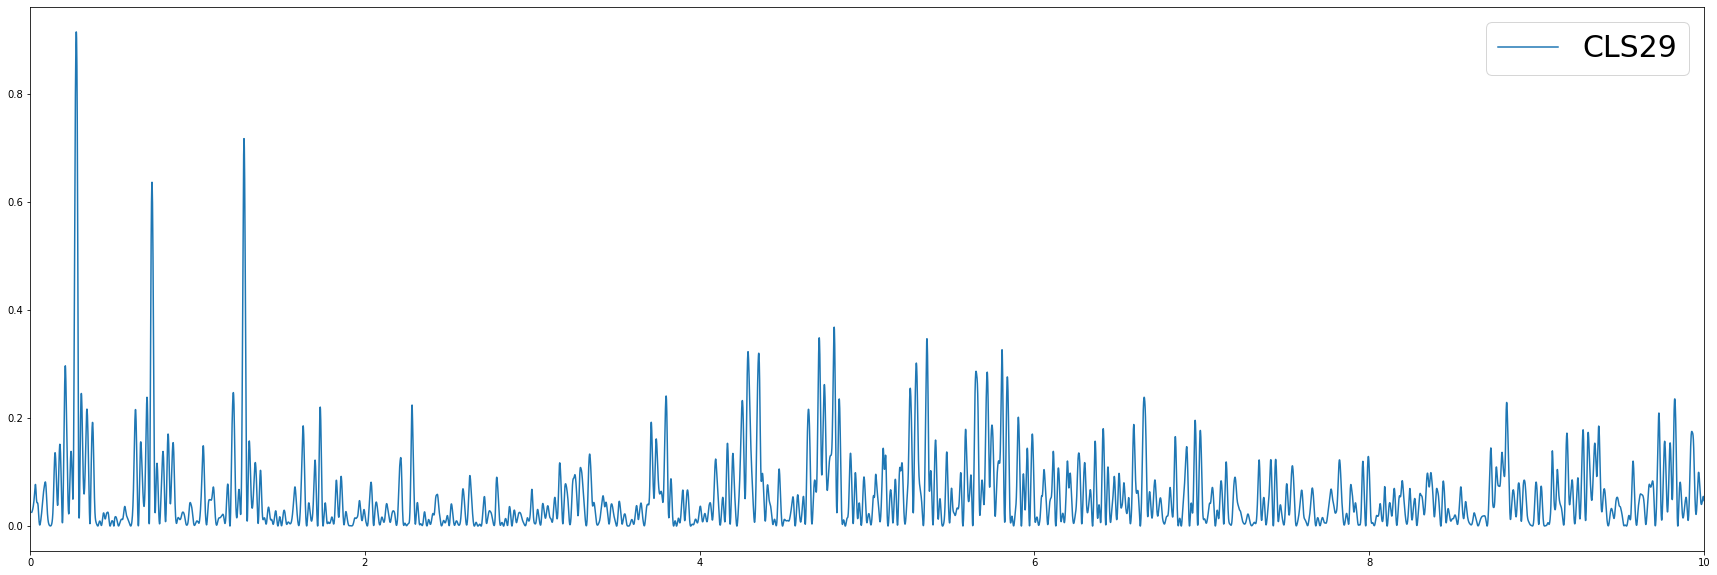

In [4]:
dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned1Up.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned2Up.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned3Up.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT3,revFluxLT3,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned4Up.xls', delimiter='\t')
timeLT4 = dataLT2['JD_UTC']
revFluxLT4 = dataLT2['rel_flux_T1']
fluxErr4 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT4,revFluxLT4,'rx')


dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned5Up.xls', delimiter='\t')
timeLT5 = dataLT2['JD_UTC']
revFluxLT5 = dataLT2['rel_flux_T1']
fluxErr5 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT5,revFluxLT5,'rx')

dataLT2 = pd.read_csv('LewisLT/CLS29/Aligned6Up.xls', delimiter='\t')
timeLT6 = dataLT2['JD_UTC']
revFluxLT6 = dataLT2['rel_flux_T1']
fluxErr6 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT6,revFluxLT6,'rx')



allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allTime = np.append(allTime,timeLT4)
allTime = np.append(allTime,timeLT5)
allTime = np.append(allTime,timeLT6)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allFlux = np.append(allFlux,revFluxLT4)
allFlux = np.append(allFlux,revFluxLT5)
allFlux = np.append(allFlux,revFluxLT6)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)
allErr = np.append(allErr,fluxErr4)
allErr = np.append(allErr,fluxErr5)
allErr = np.append(allErr,fluxErr6)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

#np.savetxt('CLS29.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux,allErr).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux,allErr).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='CLS29')
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('CLS29.pdf')

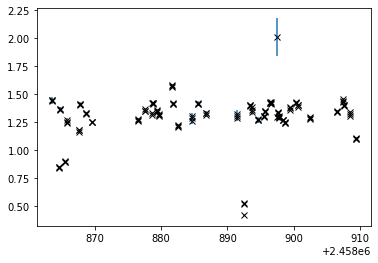

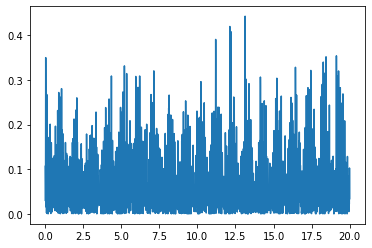

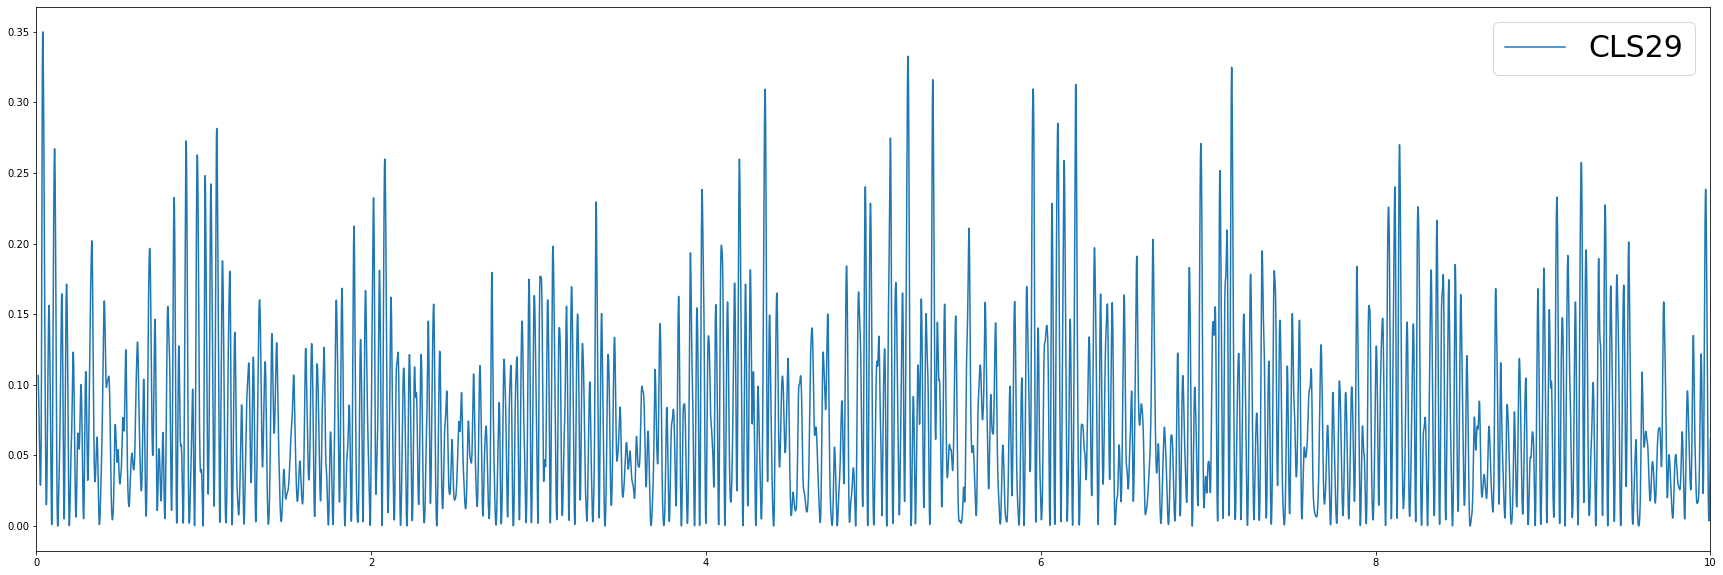

In [5]:
dataLT2 = pd.read_csv('LewisLT/CLS29/AlignedUpUp.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT1,revFluxLT1,'kx')





allTime = timeLT1
allFlux = revFluxLT1
allErr = fluxErr1

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

#np.savetxt('CLS29.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux,allErr).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux,allErr).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='CLS29')
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('CLS29.pdf')

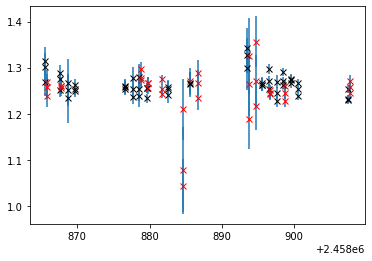

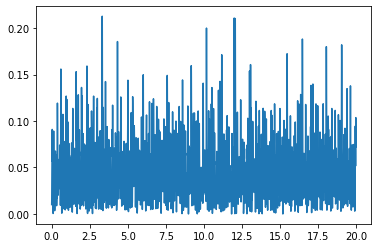

Tar Count:  57741.73758930001 ; C1 Count:  30069.958150455557 ; C2 Count:  8472.742377077779 ; C3 Count:  25680.130397280376


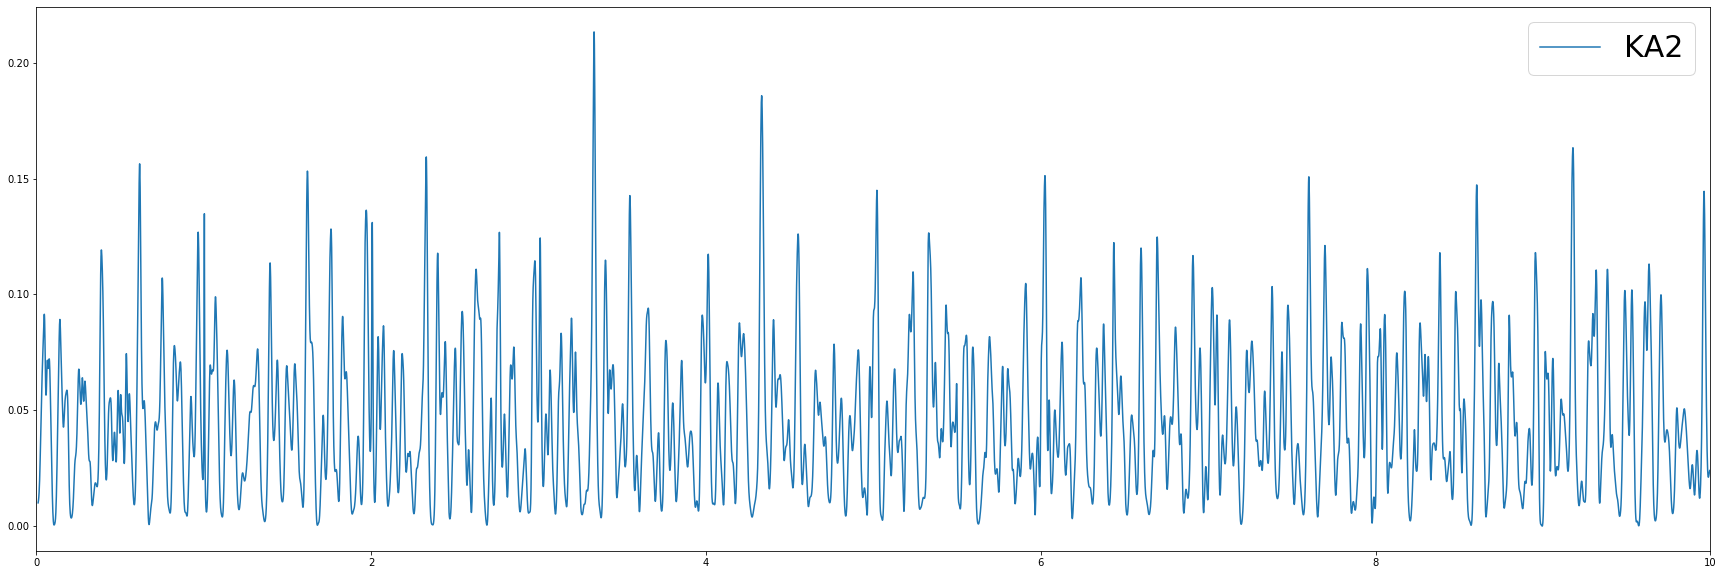

In [15]:
dataLT2 = pd.read_csv('LewisLT/KA2/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/KA2/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/KA2/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
C2Count3 = dataLT2['Source-Sky_C3']
C3Count3 = dataLT2['Source-Sky_C4']
plt.plot(timeLT3,revFluxLT3,'kx')




allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('KA2.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='KA2')
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('KA2.pdf')

allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)


allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)


allC2Count = np.append(C2Count1,C2Count2)
allC2Count = np.append(allC2Count,C2Count3)


allC3Count = np.append(C3Count1,C3Count2)
allC3Count = np.append(allC1Count,C3Count3)


print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count))


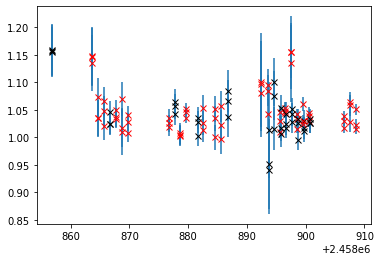

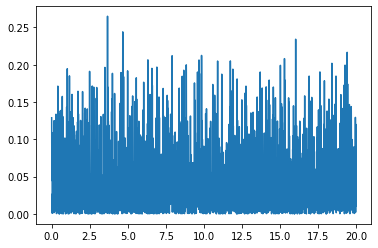

Tar Count:  22926.9599245 ; C1 Count:  7826.273467749998 ; C2 Count:  14112.337782277777


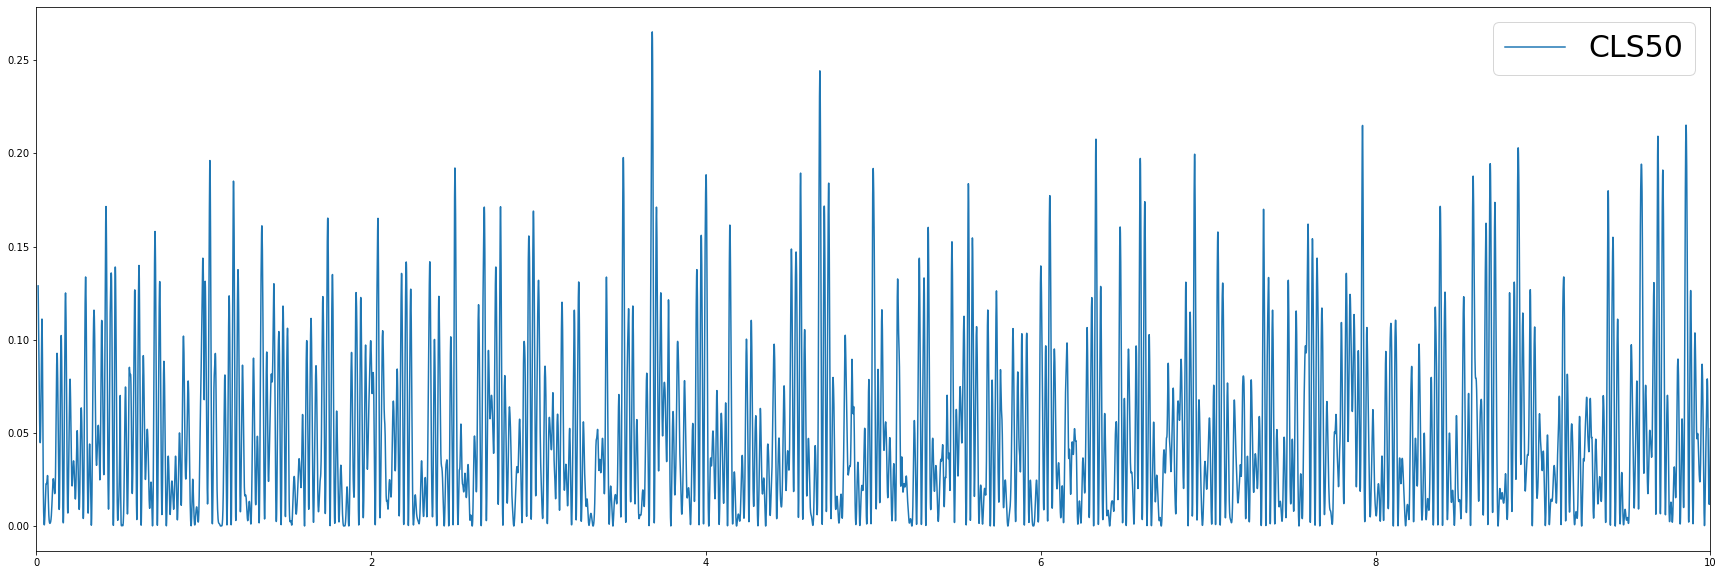

In [21]:
dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
C2Count3 = dataLT2['Source-Sky_C3']
plt.plot(timeLT3,revFluxLT3,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned4.xls', delimiter='\t')
timeLT4 = dataLT2['JD_UTC']
revFluxLT4 = dataLT2['rel_flux_T1']
fluxErr4 = dataLT2['rel_flux_err_T1']
TarCount4 = dataLT2['Source-Sky_T1']
C1Count4 = dataLT2['Source-Sky_C2']
C2Count4 = dataLT2['Source-Sky_C3']
plt.plot(timeLT4,revFluxLT4,'rx')






allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allTime = np.append(allTime,timeLT4)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allFlux = np.append(allFlux,revFluxLT4)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)
allErr = np.append(allErr,fluxErr4)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('CLS50.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='CLS50')
unsatF = freq
unsatPl = powerPl
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('CLS50.pdf')
allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)
allTarCount = np.append(allTarCount,TarCount4)

allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)
allC1Count = np.append(allC1Count,C1Count4)

allC2Count = np.append(C2Count1,C2Count2)
allC2Count = np.append(allC2Count,C2Count3)
allC2Count = np.append(allC2Count,C2Count4)



print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count))


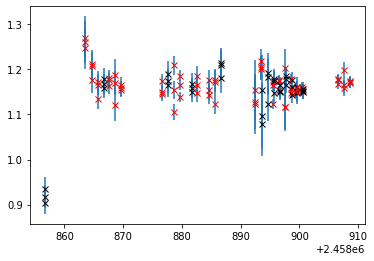

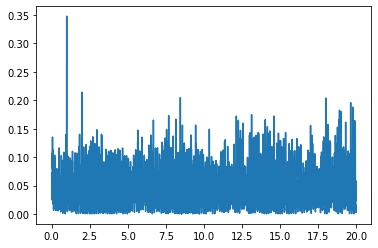

(0, 10)

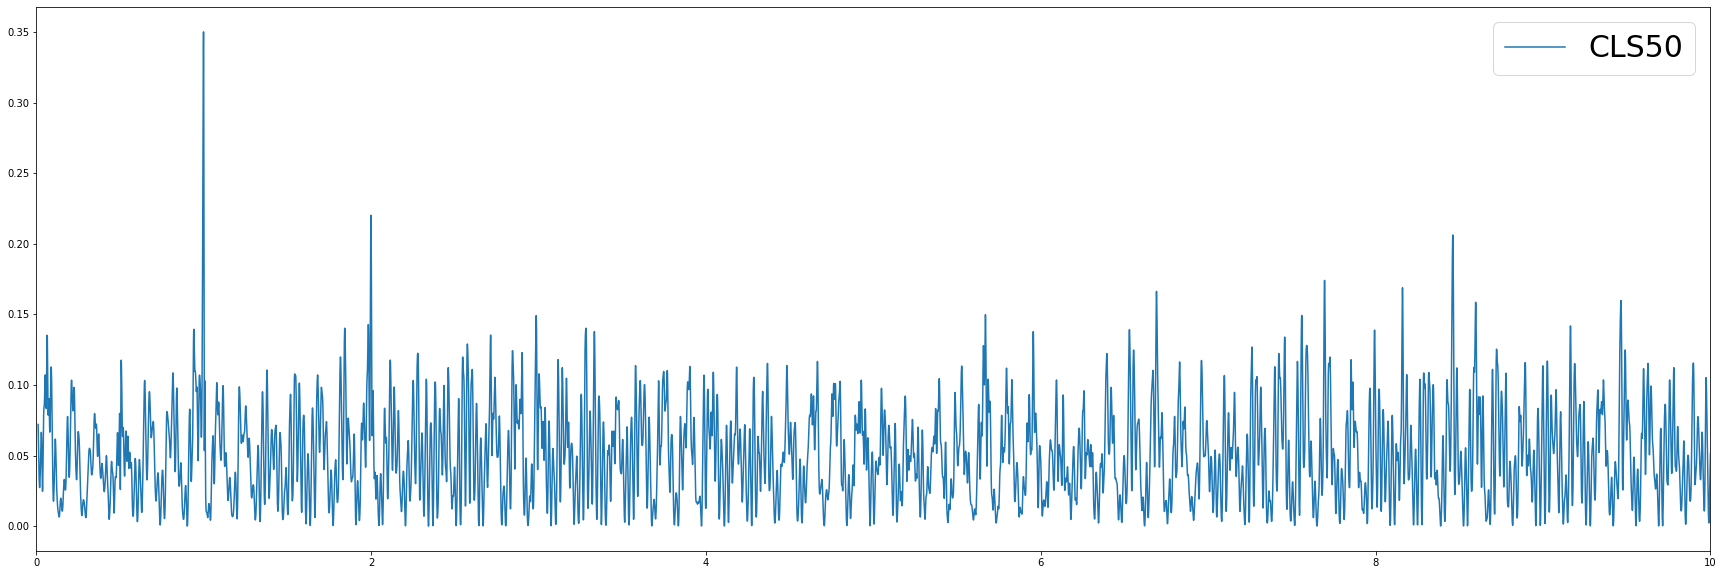

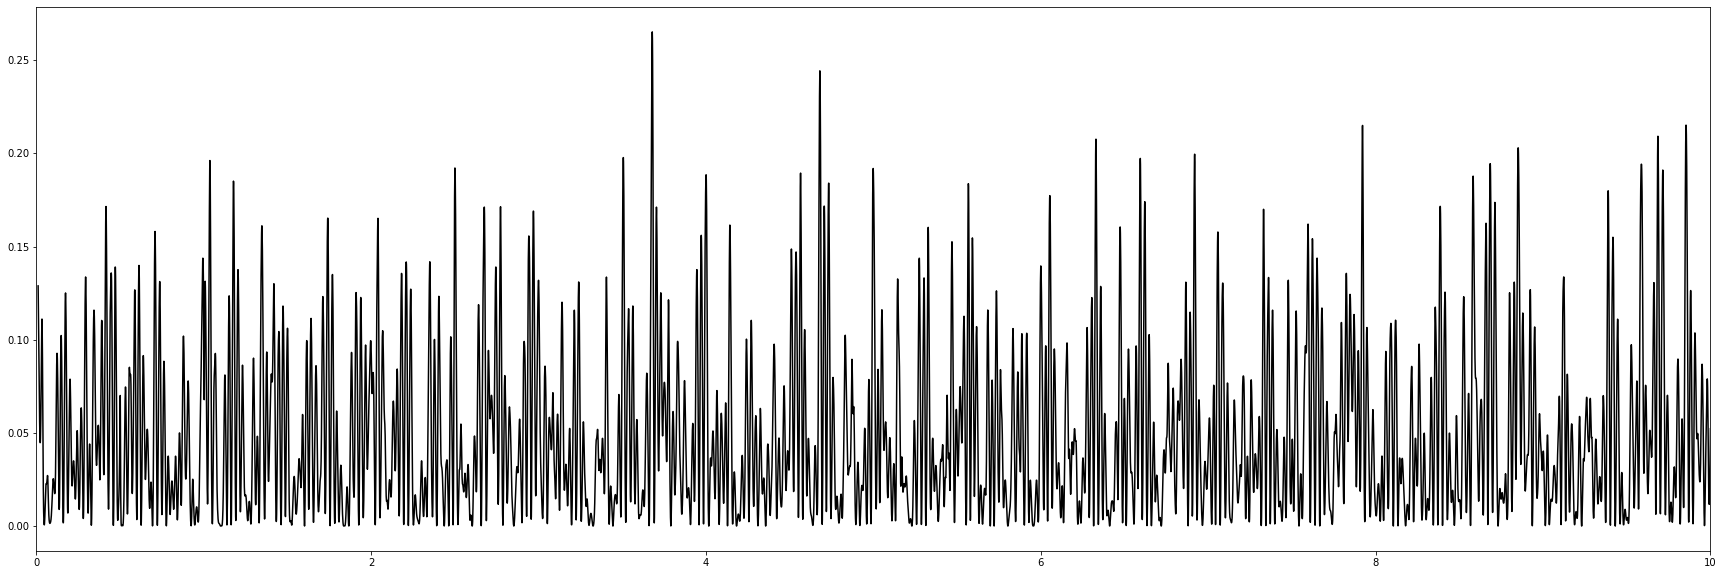

In [29]:
dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned1U.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']

plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned2U.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned3U.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT3,revFluxLT3,'kx')

dataLT2 = pd.read_csv('LewisLT/CLS50/Aligned4U.xls', delimiter='\t')
timeLT4 = dataLT2['JD_UTC']
revFluxLT4 = dataLT2['rel_flux_T1']
fluxErr4 = dataLT2['rel_flux_err_T1']

plt.plot(timeLT4,revFluxLT4,'rx')






allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allTime = np.append(allTime,timeLT4)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allFlux = np.append(allFlux,revFluxLT4)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)
allErr = np.append(allErr,fluxErr4)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('CLS50.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
#plt.plot(unsatF,unsatPl,c='k')
plt.plot(freq,powerPl,label='CLS50')

plt.xlim(0,10)
plt.legend(fontsize=30)
plt.figure(figsize=(30,10))
plt.plot(unsatF,unsatPl,c='k')
plt.xlim(0,10)
#plt.plot([1,1],[0,0.4])
#plt.savefig('CLS50.pdf')


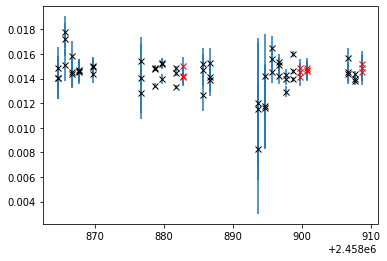

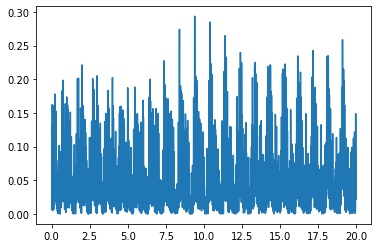

Tar Count:  4466.561235144926 ; C1 Count:  25390.359091782608 ; C2 Count:  70735.21360356521 ; C3 Count:  17287.487138333334 ; C4 Count:  194308.37348105796


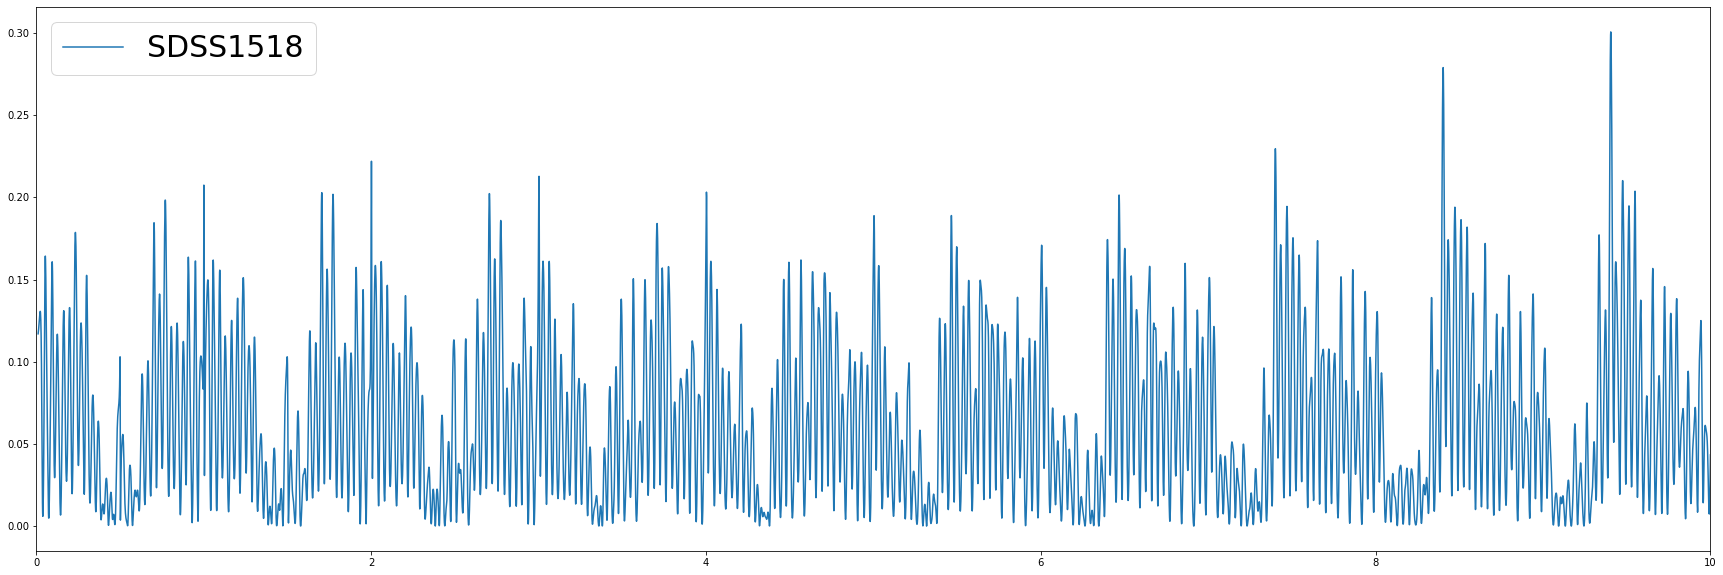

In [17]:
dataLT2 = pd.read_csv('LewisLT/SDSS1518/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
C4Count1 = dataLT2['Source-Sky_C5']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS1518/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
C4Count2 = dataLT2['Source-Sky_C5']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/SDSS1518/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
C2Count3 = dataLT2['Source-Sky_C3']
C3Count3 = dataLT2['Source-Sky_C4']
C4Count3 = dataLT2['Source-Sky_C5']
plt.plot(timeLT3,revFluxLT3,'kx')






allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('SDSS1518.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS1518')
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('SDSS1518.pdf')

allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)

allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)

allC2Count = np.append(C2Count1,C2Count2)
allC2Count = np.append(allC2Count,C2Count3)

allC3Count = np.append(C3Count1,C3Count2)
allC3Count = np.append(allC3Count,C3Count3)

allC4Count = np.append(C4Count1,C4Count2)
allC4Count = np.append(allC4Count,C4Count3)

print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count), '; C4 Count: ',np.mean(allC4Count))


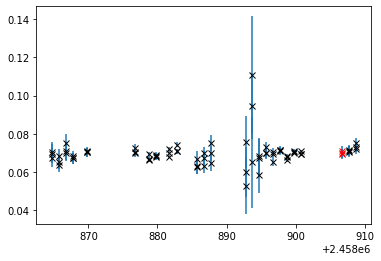

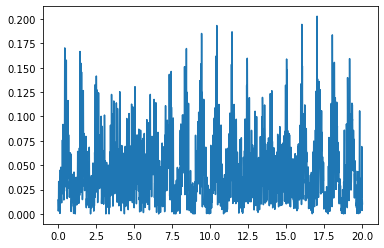

Tar Count:  7000.4125066533325 ; C1 Count:  57068.47285421333 ; C2 Count:  22725.69389574667 ; C3 Count:  55653.63077358974


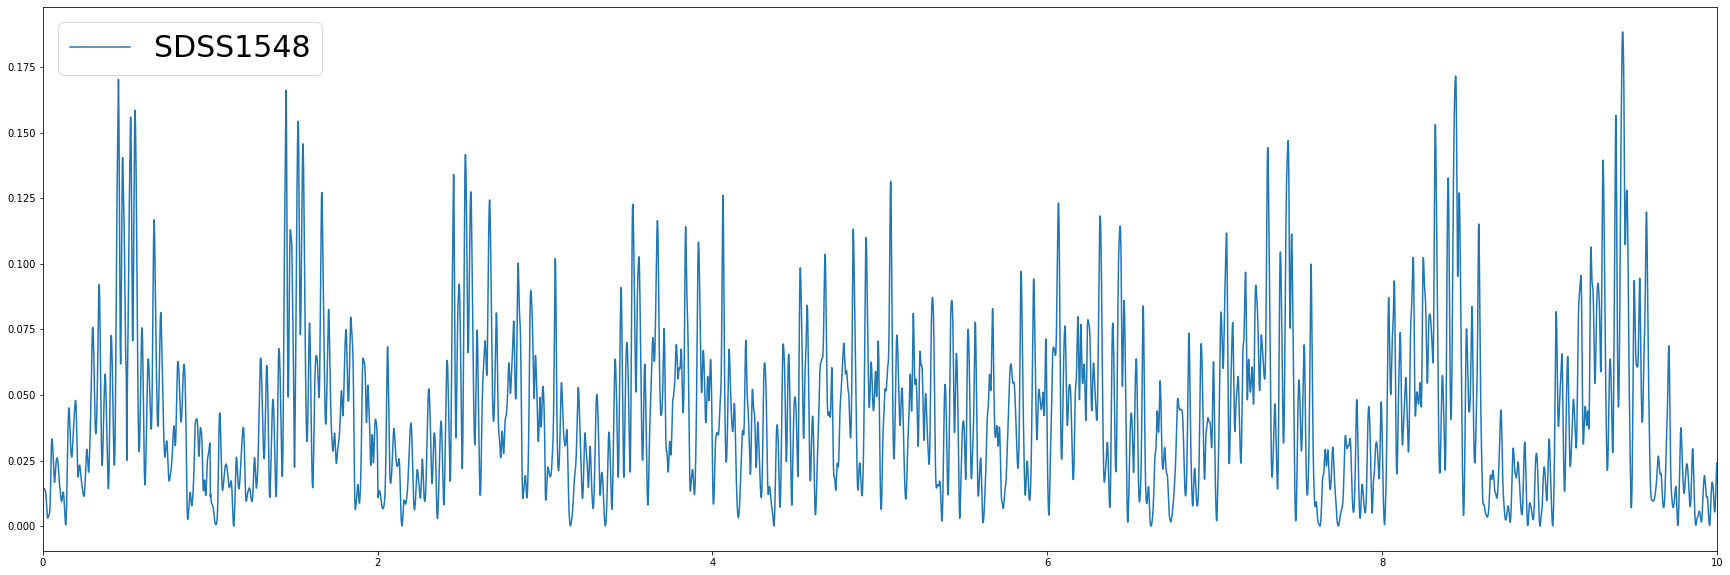

In [18]:
dataLT2 = pd.read_csv('LewisLT/SDSS1548/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
plt.plot(timeLT1,revFluxLT1,'kx')

dataLT2 = pd.read_csv('LewisLT/SDSS1548/Aligned2.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']
revFluxLT2 = dataLT2['rel_flux_T1']
fluxErr2 = dataLT2['rel_flux_err_T1']
TarCount2 = dataLT2['Source-Sky_T1']
C1Count2 = dataLT2['Source-Sky_C2']
C2Count2 = dataLT2['Source-Sky_C3']
C3Count2 = dataLT2['Source-Sky_C4']
plt.plot(timeLT2,revFluxLT2,'rx')


dataLT2 = pd.read_csv('LewisLT/SDSS1548/Aligned3.xls', delimiter='\t')
timeLT3 = dataLT2['JD_UTC']
revFluxLT3 = dataLT2['rel_flux_T1']
fluxErr3 = dataLT2['rel_flux_err_T1']
TarCount3 = dataLT2['Source-Sky_T1']
C1Count3 = dataLT2['Source-Sky_C2']
C2Count3 = dataLT2['Source-Sky_C3']
C3Count3 = dataLT2['Source-Sky_C4']
plt.plot(timeLT3,revFluxLT3,'kx')






allTime = np.append(timeLT1,timeLT2)
allTime = np.append(allTime,timeLT3)
allFlux = np.append(revFluxLT1,revFluxLT2)
allFlux = np.append(allFlux,revFluxLT3)
allErr = np.append(fluxErr1,fluxErr2)
allErr = np.append(allErr,fluxErr3)

sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
dat = np.array([allTime, allFlux,allErr])

dat = dat.T

np.savetxt('SDSS1548.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS1548')
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('SDSS1548.pdf')

allTarCount = np.append(TarCount1,TarCount2)
allTarCount = np.append(allTarCount,TarCount3)


allC1Count = np.append(C1Count1,C1Count2)
allC1Count = np.append(allC1Count,C1Count3)


allC2Count = np.append(C2Count1,C2Count2)
allC2Count = np.append(allC2Count,C2Count3)


allC3Count = np.append(C3Count1,C3Count2)
allC3Count = np.append(allC1Count,C3Count3)


print('Tar Count: ',np.mean(allTarCount),'; C1 Count: ', np.mean(allC1Count), '; C2 Count: ',np.mean(allC2Count), '; C3 Count: ',np.mean(allC3Count))


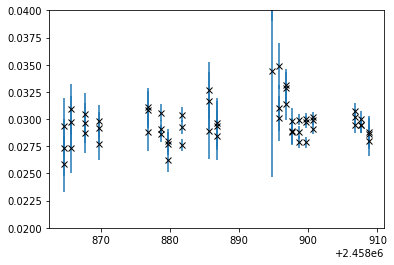

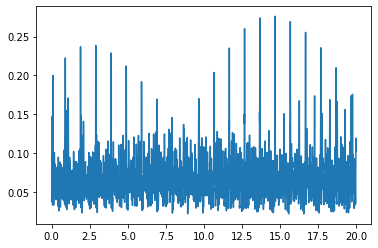

Tar Count:  5432.859094967742 ; C1 Count:  22500.846714403226 ; C2 Count:  30341.159869048395 ; C3 Count:  95728.4061900484 ; C4 Count:  16171.395448774192


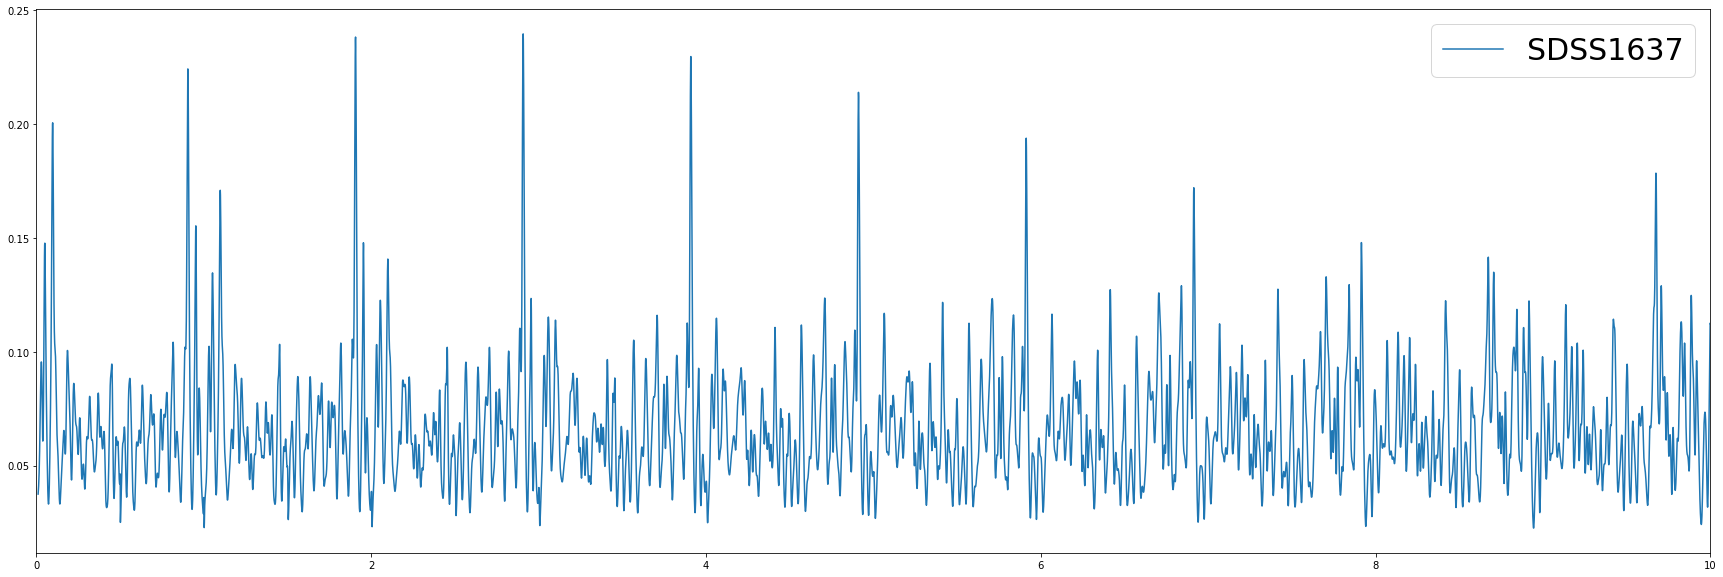

In [19]:
dataLT2 = pd.read_csv('LewisLT/SDSS1637/Aligned1.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
C2Count1 = dataLT2['Source-Sky_C3']
C3Count1 = dataLT2['Source-Sky_C4']
C4Count1 = dataLT2['Source-Sky_C5']
plt.plot(timeLT1,revFluxLT1,'kx')


plt.ylim(0.02,0.04)







plt.errorbar(timeLT1,revFluxLT1,yerr=fluxErr1,ls='')
dat = np.array([timeLT1, revFluxLT1,fluxErr1])

dat = dat.T

#np.savetxt('SDSS1637.dat', dat, delimiter = '\t')
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(timeLT1,revFluxLT1).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(timeLT1,revFluxLT1).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS1637')
plt.xlim(0,10)
plt.legend(fontsize=30)
#plt.savefig('SDSS1637.pdf')
print('Tar Count: ',np.mean(TarCount1),'; C1 Count: ', np.mean(C1Count1), '; C2 Count: ',np.mean(C2Count1), '; C3 Count: ',np.mean(C3Count1), '; C4 Count: ',np.mean(C4Count1))


In [2]:
import lightkurve as lk

In [3]:
lc = lk.search_lightcurvefile('ktwo212146514').download().PDCSAP_FLUX.remove_nans()

flux = lc.flux
time = lc.time  
flux = (flux/np.mean(flux))-1

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


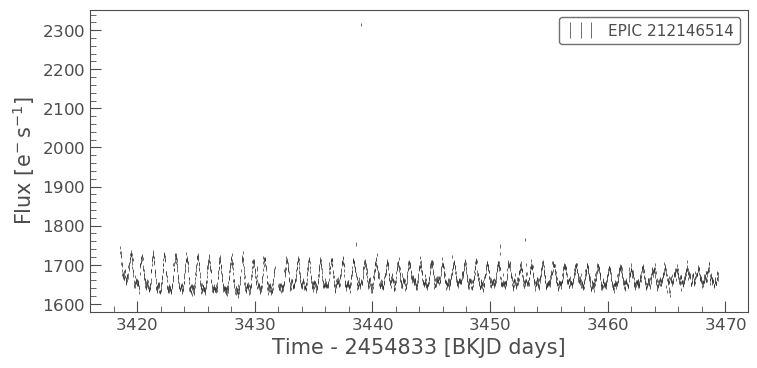

In [20]:
lc.errorbar()

(-0.05, 0.05)

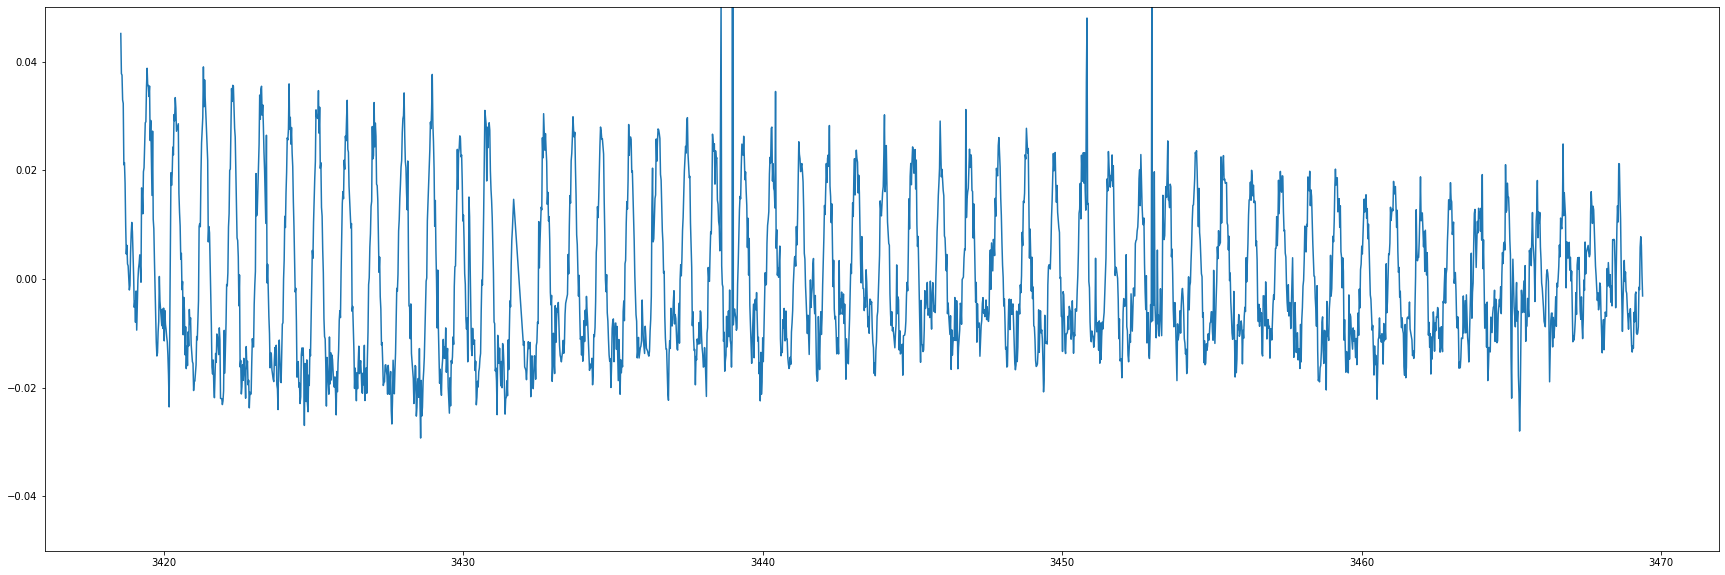

In [22]:
plt.figure(figsize=(30,10))
plt.plot(time,flux)
plt.ylim(-0.05,0.05)

In [4]:
kepplerTime = time+2454833
kepplerFlux = flux

In [5]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

(0, 10)

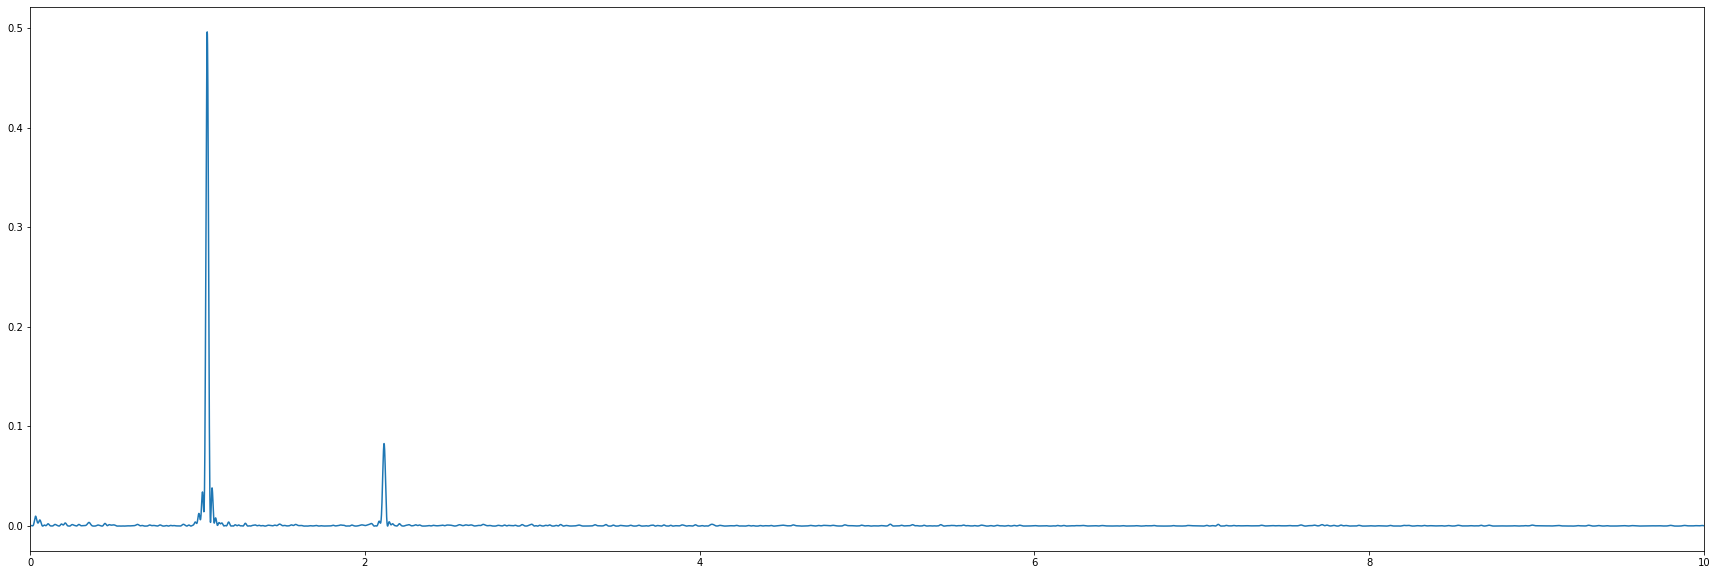

In [6]:
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(time,flux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl)
plt.xlim(0,10)

In [26]:
1/freq[np.argmax(powerPl)]

0.9451297320289239

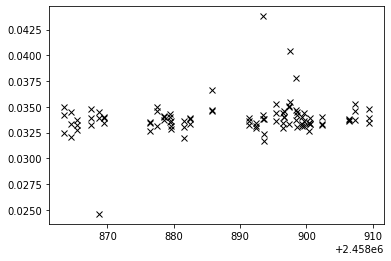

In [7]:
dataLT2 = pd.read_csv('LewisLT/SDSS0842/FinalMeasurements.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
TarCount1 = dataLT2['Source-Sky_T1']
C1Count1 = dataLT2['Source-Sky_C2']
plt.plot(timeLT1,revFluxLT1,'kx')

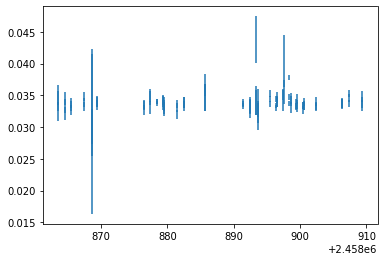

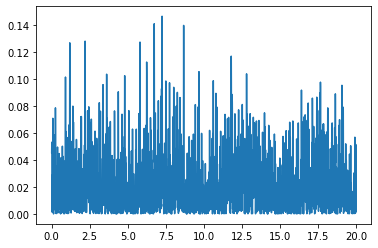

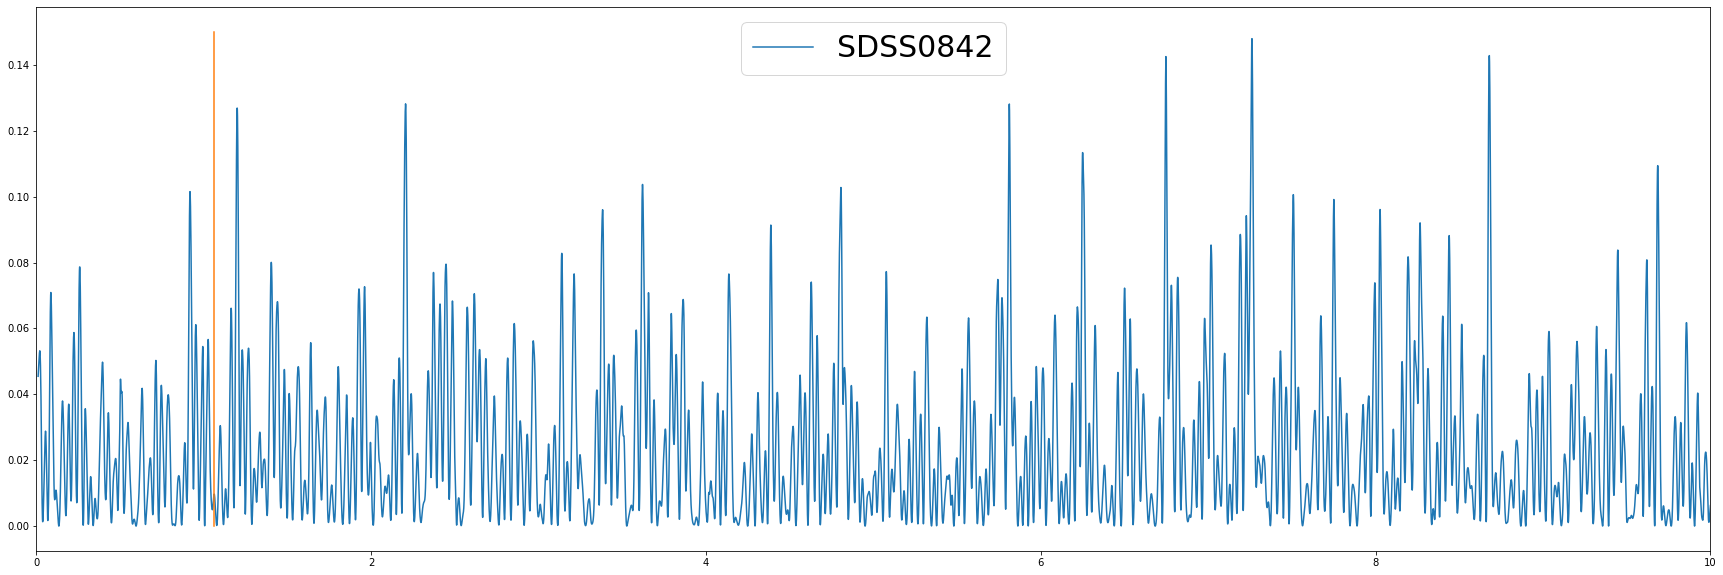

In [8]:
allTime = timeLT1
allFlux = revFluxLT1
allErr = fluxErr1
sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')

plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS0842')
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/0.945,1/0.945],[0,0.15])
#plt.savefig('SDSS0842.pdf')
keeoPow = powerPl

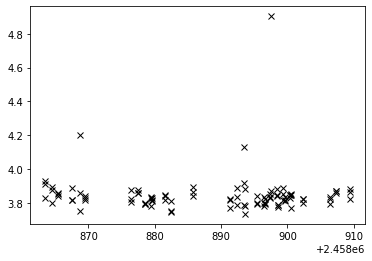

In [16]:
dataLT2 = pd.read_csv('LewisLT/SDSS0842/AlignedUpdatedVar.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT1,revFluxLT1,'kx')

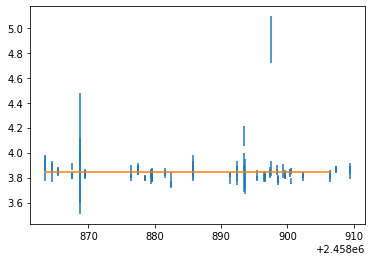

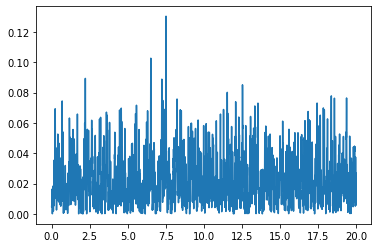

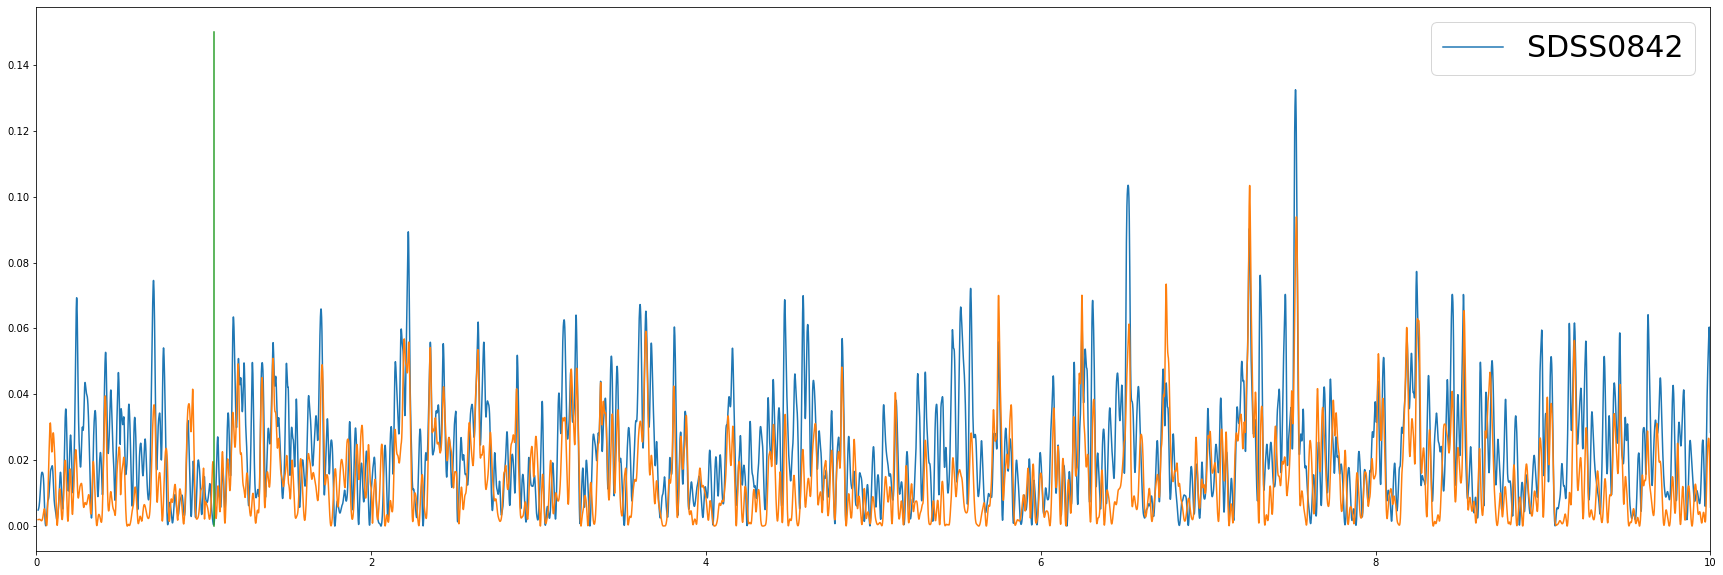

In [19]:
allTime = timeLT1
allFlux = revFluxLT1
allErr = fluxErr1
sortIndi = np.argsort(allTime)
allTime = allTime[sortIndi]
allFlux = allFlux[sortIndi]
allErr = allErr[sortIndi]
plt.errorbar(allTime,allFlux,yerr=allErr,ls='')
plt.plot([allTime[0],allTime[97]],[np.mean(allFlux),np.mean(allFlux)])
plt.show()

freq = np.linspace(0.01,20,10000)
powerPl = LombScargle(allTime,allFlux).power(freq)
plt.plot(freq,powerPl)
plt.show()
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(allTime,allFlux-np.mean(allFlux)).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl,label='SDSS0842')
plt.plot(freq,keeoPow/2)
plt.xlim(0,10)
plt.legend(fontsize=30)
plt.plot([1/0.945,1/0.945],[0,0.15])
#plt.savefig('SDSS0842.pdf')


In [9]:
KeppelrPhases = foldMeth(kepplerTime, 0.9451297320289239)
sortIndi = np.argsort(KeppelrPhases)
KeppelrPhases = KeppelrPhases[sortIndi]
KepplerFluxSort = kepplerFlux[sortIndi]

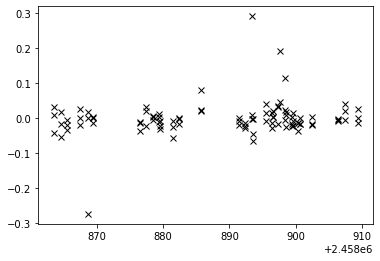

In [10]:
dataLT2 = pd.read_csv('LewisLT/SDSS0842/FinalMeasurements.xls', delimiter='\t')
timeLT1 = dataLT2['JD_UTC']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT1,revFluxLT1/np.mean(revFluxLT1)-1,'kx')

In [11]:
LTPhases = foldMeth(timeLT1, 0.9451297320289239)
sortIndi = np.argsort(LTPhases)
LTPhases = LTPhases[sortIndi]
FluxLT = (revFluxLT1/np.mean(revFluxLT1))-1
FluxLTSort = FluxLT[sortIndi]
ErrSort = fluxErr1[sortIndi]

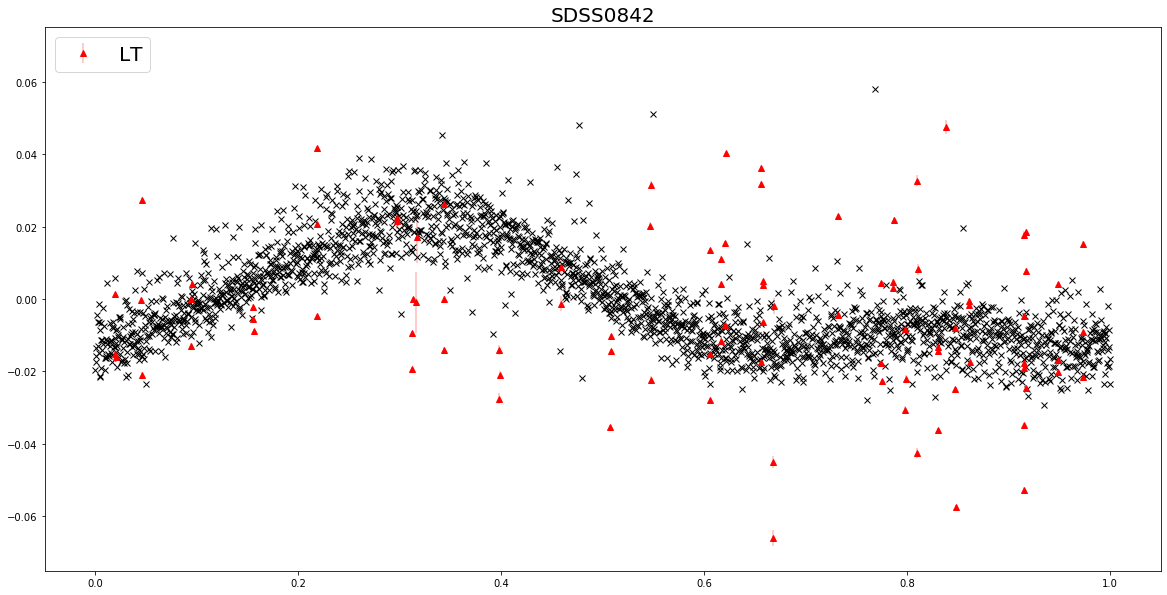

In [12]:
plt.figure(figsize=(20,10))
plt.title('SDSS0842',fontsize=20)
plt.plot(KeppelrPhases,KepplerFluxSort,'kx')
plt.errorbar(LTPhases,FluxLTSort,yerr=ErrSort, c='r',ls='',marker='^',elinewidth=0.4,label='LT')
plt.legend(prop={'size': 20})
plt.ylim(-0.075,0.075)
plt.savefig('SDSS0842Fold.pdf')

In [59]:
search_result15 = lk.search_tesscut('SBSS 1310+561', sector=15)

search_result16 = lk.search_tesscut('SBSS 1310+561', sector=16)

search_result22 = lk.search_tesscut('SBSS 1310+561', sector=22)


tpf15 = search_result15.download(cutout_size=50)
tpf16 = search_result16.download(cutout_size=50)
tpf22 = search_result22.download(cutout_size=50)

Apperture size  5


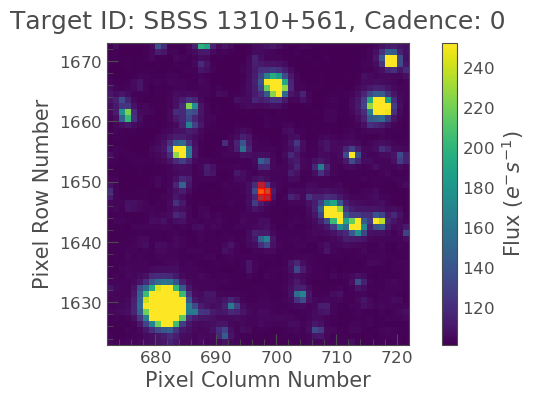

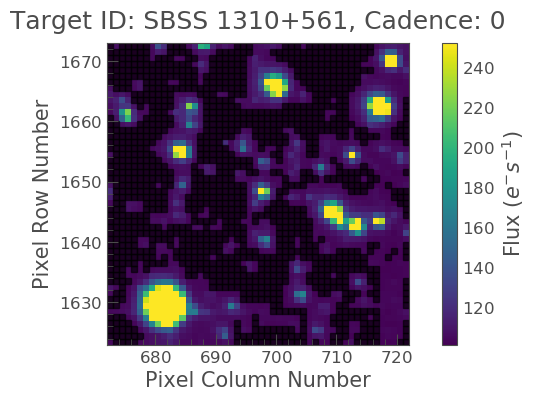

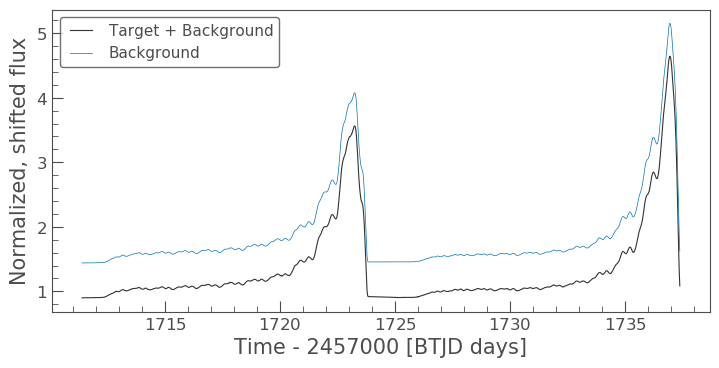

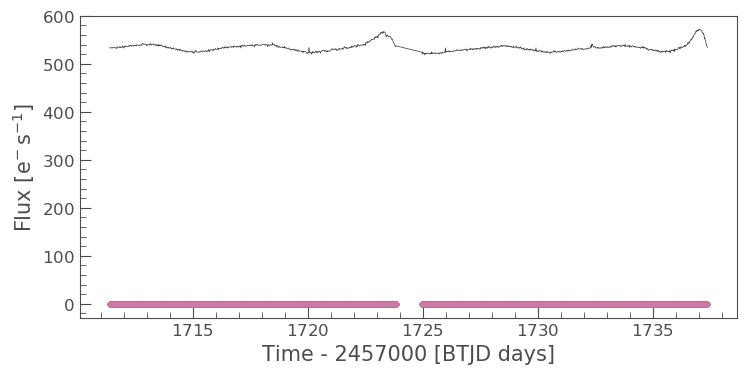

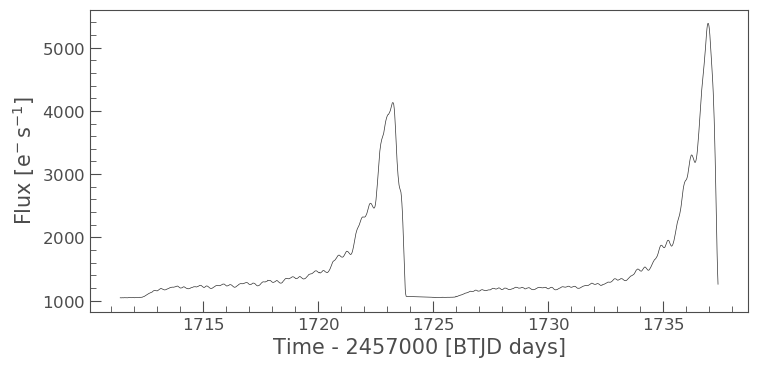

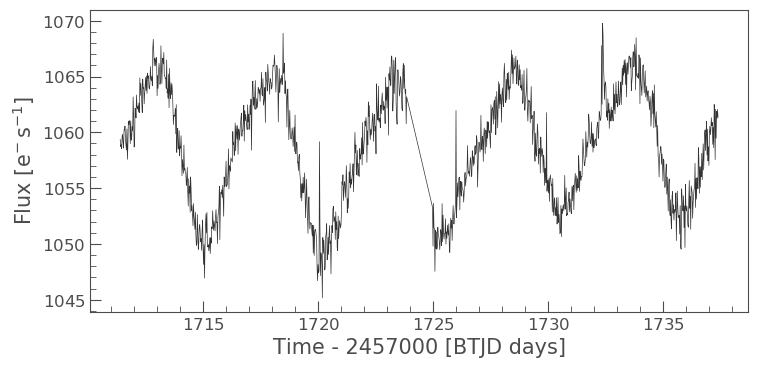

In [60]:
target_mask = tpf15.create_threshold_mask(threshold=15, reference_pixel='center')
print('Apperture size ', target_mask.sum())
tpf15.plot(aperture_mask=target_mask, mask_color='r')
target_lc = tpf15.to_lightcurve(aperture_mask=target_mask)
background_mask = ~tpf15.create_threshold_mask(threshold=0.001, reference_pixel=None)
tpf15.plot(aperture_mask=background_mask, mask_color='k')
background_lc_per_pixel = tpf15.to_lightcurve(aperture_mask=background_mask) / background_mask.sum()
background_estimate_lc = background_lc_per_pixel * target_mask.sum()
common_normalization = np.nanpercentile(target_lc.flux, 15)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=0.8)
(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux')
corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot()
regressors = tpf15.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(2)
plt.plot(tpf15.time, dm.values + np.arange(2)*0.2, '.')
regressors = tpf15.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(2)
plt.plot(tpf15.time, dm.values + np.arange(2)*0.2, '.')
dm = dm.append_constant()
raw_lc = tpf15.to_lightcurve(aperture_mask=target_mask)
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc = corrector.correct(dm)
model = corrector.model_lc
model -= np.percentile(model.flux, 5)
corrected_lc = raw_lc - model

#corrected_lcBad = corrector.correct(dm)
raw_lc.plot()
corrected_lc.plot()

In [63]:
sec15F = corrected_lc.flux
sec15T = corrected_lc.time

Apperture size  4


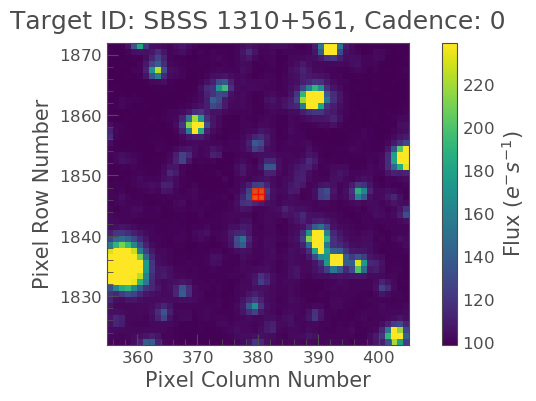

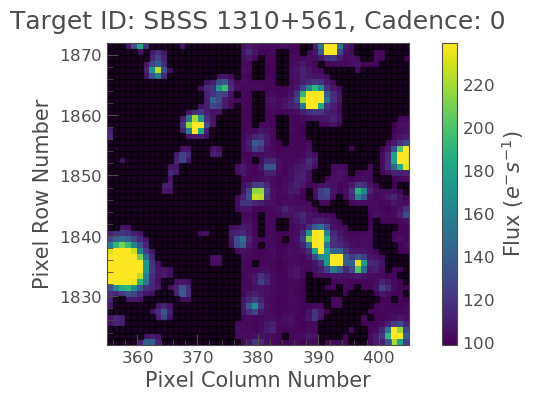

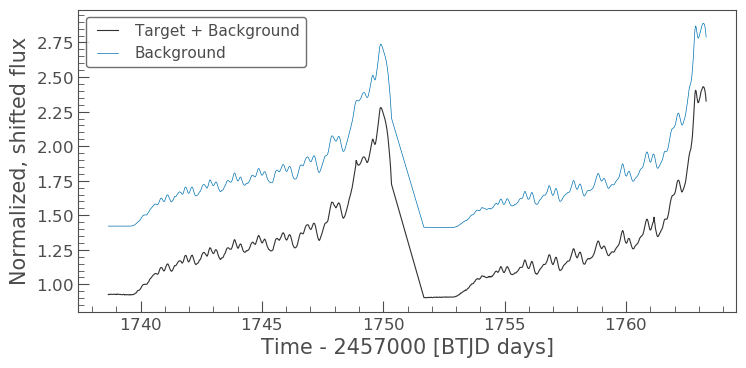

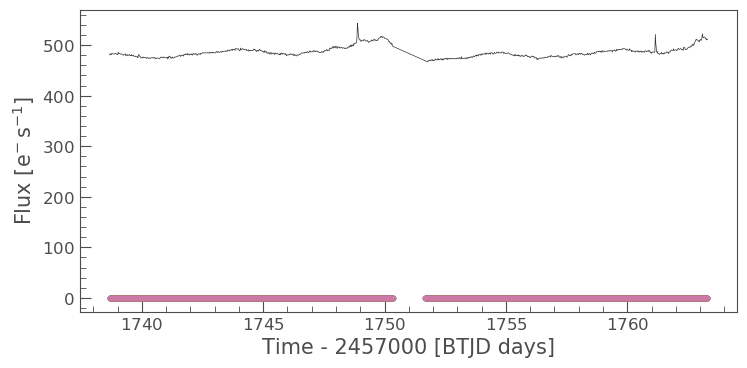

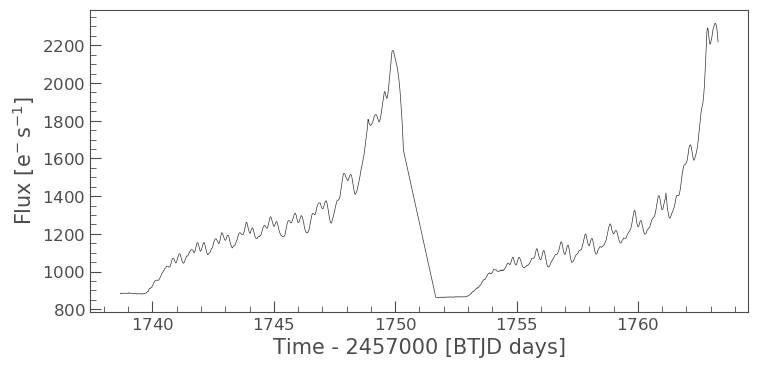

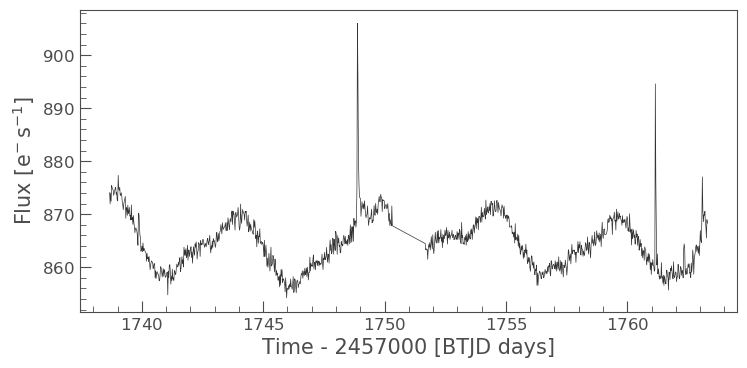

In [64]:
target_mask = tpf16.create_threshold_mask(threshold=15, reference_pixel='center')
print('Apperture size ', target_mask.sum())
tpf16.plot(aperture_mask=target_mask, mask_color='r')
target_lc = tpf16.to_lightcurve(aperture_mask=target_mask)
background_mask = ~tpf16.create_threshold_mask(threshold=0.001, reference_pixel=None)
tpf16.plot(aperture_mask=background_mask, mask_color='k')
background_lc_per_pixel = tpf16.to_lightcurve(aperture_mask=background_mask) / background_mask.sum()
background_estimate_lc = background_lc_per_pixel * target_mask.sum()
common_normalization = np.nanpercentile(target_lc.flux, 15)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=0.8)
(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux')
corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot()
regressors = tpf16.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(2)
plt.plot(tpf16.time, dm.values + np.arange(2)*0.2, '.')
regressors = tpf16.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(2)
plt.plot(tpf16.time, dm.values + np.arange(2)*0.2, '.')
dm = dm.append_constant()
raw_lc = tpf16.to_lightcurve(aperture_mask=target_mask)
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc = corrector.correct(dm)
model = corrector.model_lc
model -= np.percentile(model.flux, 5)
corrected_lc = raw_lc - model

#corrected_lcBad = corrector.correct(dm)
raw_lc.plot()
corrected_lc.plot()

In [65]:
sec16F = corrected_lc.flux
sec16T = corrected_lc.time

Apperture size  6


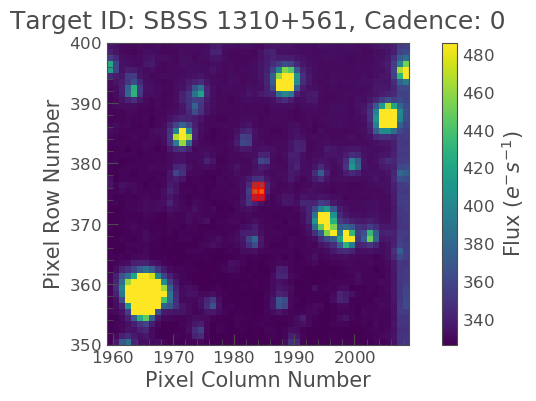

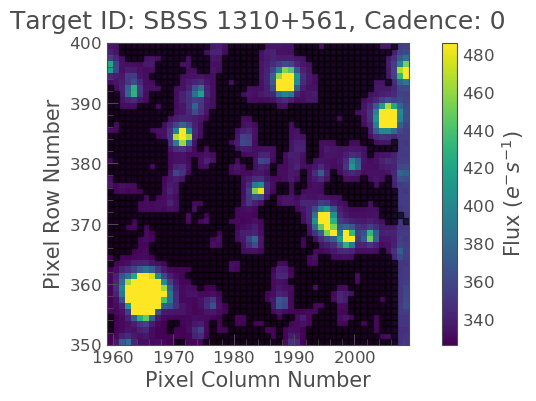

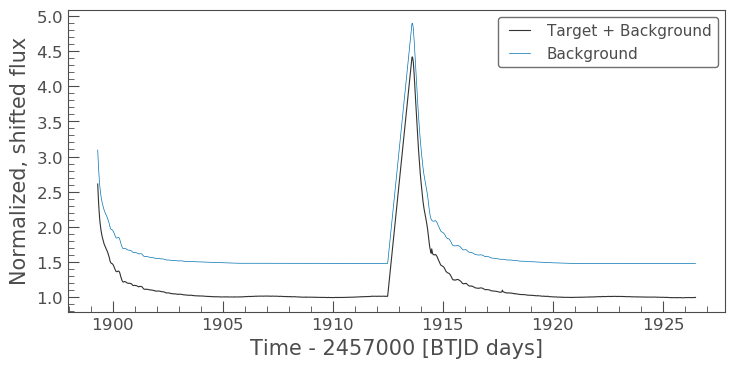

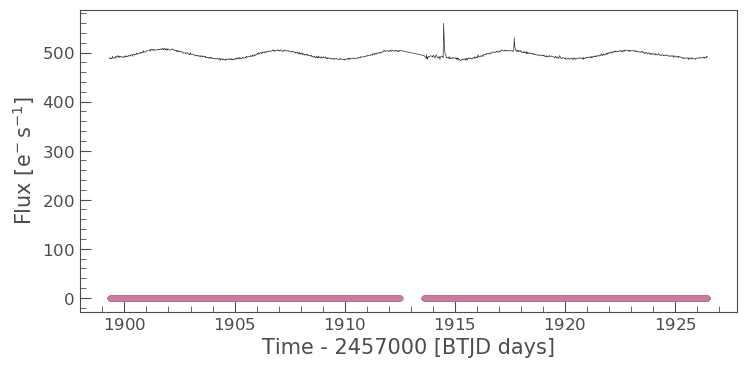

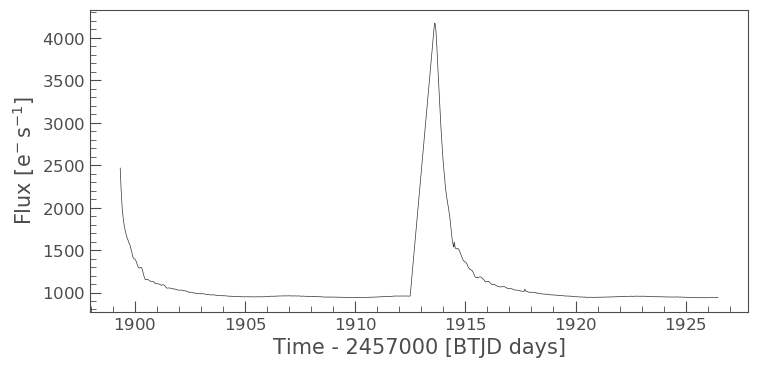

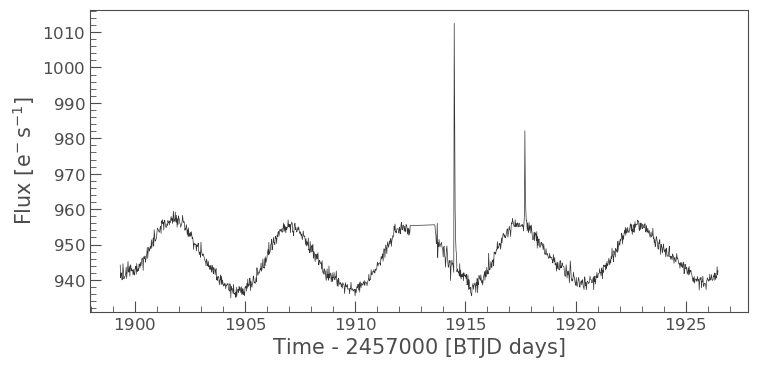

In [66]:
target_mask = tpf22.create_threshold_mask(threshold=15, reference_pixel='center')
print('Apperture size ', target_mask.sum())
tpf22.plot(aperture_mask=target_mask, mask_color='r')
target_lc = tpf22.to_lightcurve(aperture_mask=target_mask)
background_mask = ~tpf22.create_threshold_mask(threshold=0.001, reference_pixel=None)
tpf22.plot(aperture_mask=background_mask, mask_color='k')
background_lc_per_pixel = tpf22.to_lightcurve(aperture_mask=background_mask) / background_mask.sum()
background_estimate_lc = background_lc_per_pixel * target_mask.sum()
common_normalization = np.nanpercentile(target_lc.flux, 15)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=0.8)
(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux')
corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot()
regressors = tpf22.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(2)
plt.plot(tpf22.time, dm.values + np.arange(2)*0.2, '.')
regressors = tpf22.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(2)
plt.plot(tpf22.time, dm.values + np.arange(2)*0.2, '.')
dm = dm.append_constant()
raw_lc = tpf22.to_lightcurve(aperture_mask=target_mask)
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc = corrector.correct(dm)
model = corrector.model_lc
model -= np.percentile(model.flux, 5)
corrected_lc = raw_lc - model

#corrected_lcBad = corrector.correct(dm)
raw_lc.plot()
corrected_lc.plot()

In [67]:
sec22F = corrected_lc.flux
sec22T = corrected_lc.time

In [69]:
TESSAllTime = np.append(sec15T+2457000,sec16T+2457000)
TESSAllTime = np.append(TESSAllTime, sec22T+2457000)
TESSAllFlux = np.append((sec15F/np.mean(sec15F))-1,(sec16F/np.mean(sec16F))-1)
TESSAllFlux = np.append(TESSAllFlux,(sec22F/np.mean(sec22F))-1)

5.267649708406429


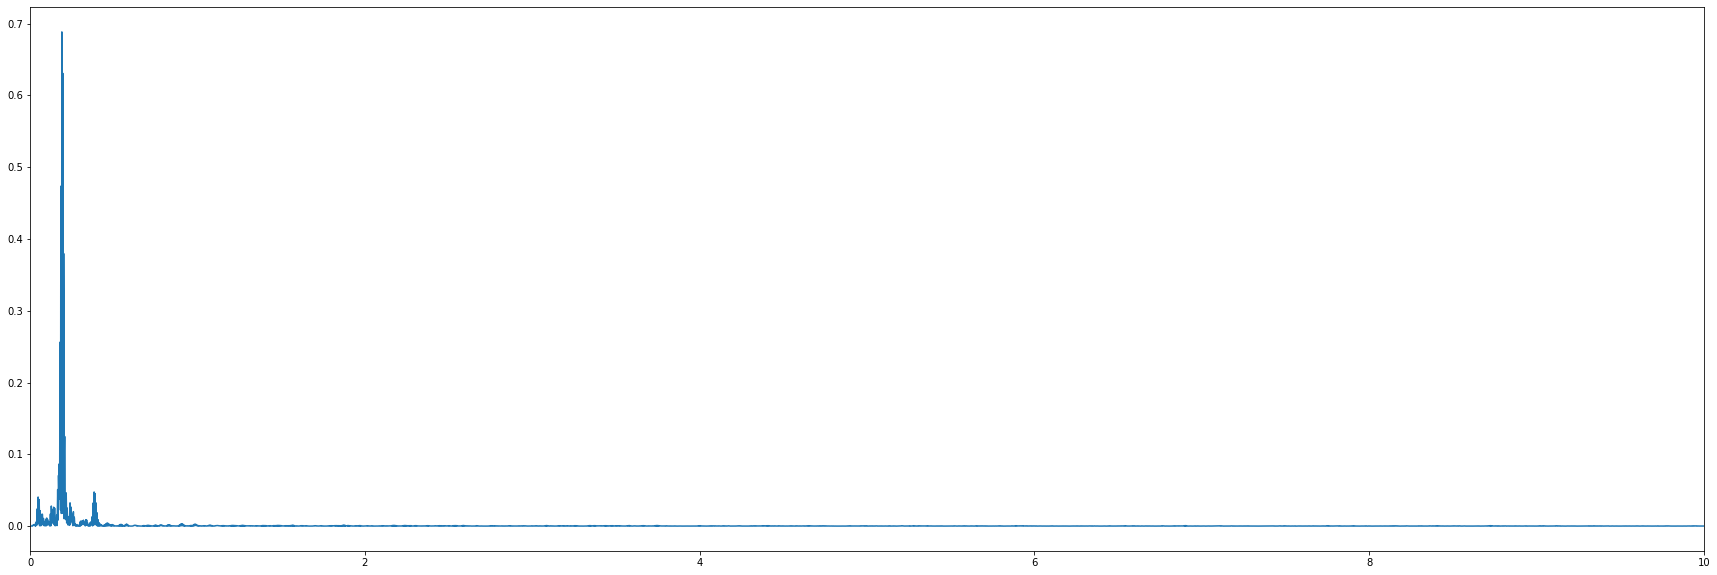

In [71]:
freq = np.linspace(0.01,10,10000)
powerPl = LombScargle(TESSAllTime,TESSAllFlux).power(freq)
plt.figure(figsize=(30,10))
plt.plot(freq,powerPl)
plt.xlim(0,10)
print(1/freq[np.argmax(powerPl)])

In [72]:
TESSPhase = foldMeth(TESSAllTime, 5.267649708406429)
sortIndi = np.argsort(TESSPhase)
TESSPhase = TESSPhase[sortIndi]
TESSAllFluxSort = TESSAllFlux[sortIndi]

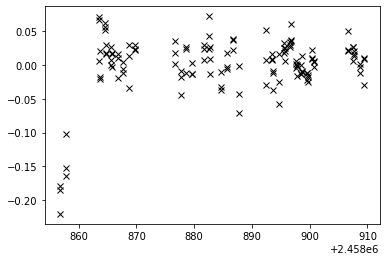

In [74]:
dataLT2 = pd.read_csv('LewisLT/SBSS1310/AlignedUpdatedVar.xls', delimiter='\t')
timeLT1 = dataLT2['BJD_TDB']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT1,revFluxLT1/np.mean(revFluxLT1)-1,'kx')


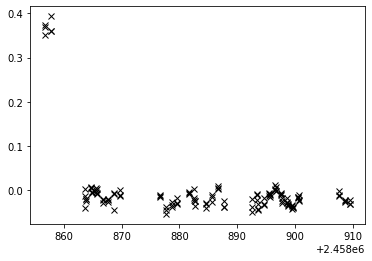

In [85]:
dataLT2 = pd.read_csv('LewisLT/SBSS1310/AlignedUpdatedVarGood.xls', delimiter='\t')
timeLT1 = dataLT2['BJD_TDB']
revFluxLT1 = dataLT2['rel_flux_T1']
fluxErr1 = dataLT2['rel_flux_err_T1']
plt.plot(timeLT1,revFluxLT1/np.mean(revFluxLT1)-1,'kx')


In [86]:
LTPhases = foldMeth(timeLT1, 5.267649708406429)
sortIndi = np.argsort(LTPhases)
LTPhases = LTPhases[sortIndi]
FluxLT = (revFluxLT1/np.mean(revFluxLT1))-1
FluxLTSort = FluxLT[sortIndi]
ErrSort = fluxErr1[sortIndi]

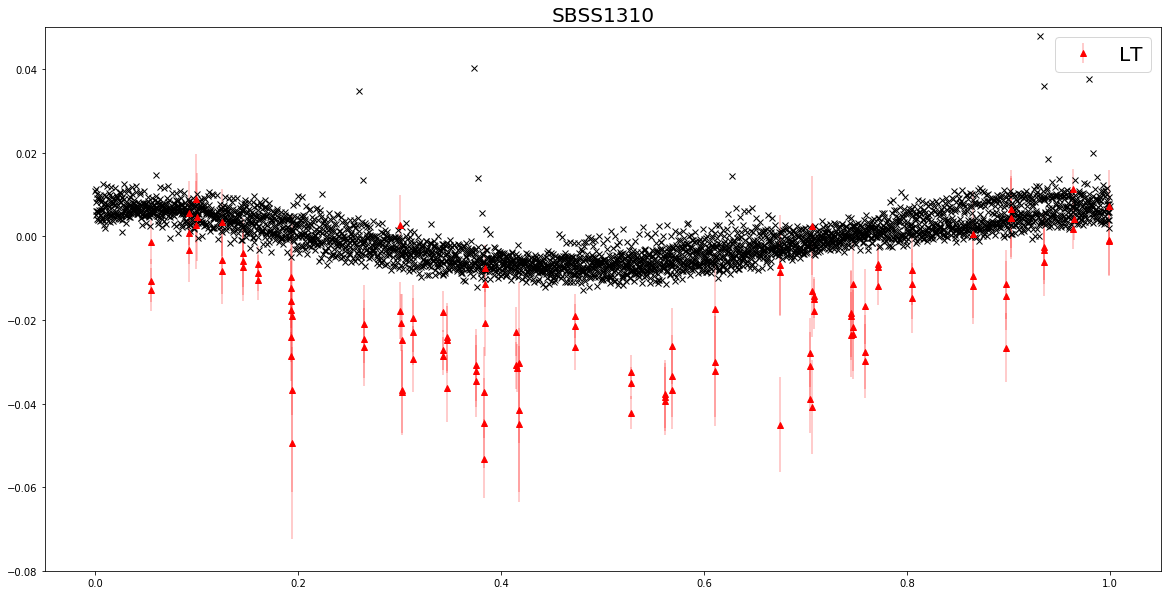

In [89]:
plt.figure(figsize=(20,10))
plt.title('SBSS1310',fontsize=20)
plt.plot(TESSPhase,TESSAllFluxSort,'kx')
plt.errorbar(LTPhases,FluxLTSort,yerr=ErrSort, c='r',ls='',marker='^',elinewidth=0.4,label='LT')
plt.legend(prop={'size': 20})
plt.ylim(-0.08,0.05)
plt.savefig('SBSS1310Fold.pdf')